# Классификация музыкальных производений по жанрам

## Краткий комментарий студента по работе перед ревью проекта: 
1) В разделе с моделями закомментировал строки с подбором параметров, чтобы не тратить время проверяющего.
2) В каждой модели также закомментированы строки с сохранением итого файла для проверки в Kaggle, чтобы у проверяющего эти файлы не сохранялись при запуске программы

## Описание задачи

**Описание задачи**

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.


**Описание полей данных**
* instance_id -Уникальный идентификатор трека
* track_name - Название трека
* acousticness - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
* danceability - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
* duration_ms - Продолжительность трека в миллисекундах.
* energy - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
* instrumentalness - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
* key - базовый ключ (нота) произведения
* liveness - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
* loudness - Общая громкость трека в децибелах (дБ)
* mode - Указывает на модальность (мажорную или минорную) трека
speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
* tempo - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
* obtained_date - дата загрузки в сервис
* valence - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
* music_genre - Музыкальный жанр трека (целевой признак)

## Импорты

In [1]:
pip install phik


[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-learn==1.1.3


[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: catboost in c:\users\alexander\practicum\practicum_env\lib\site-packages (1.0.3)




[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import precision_recall_curve

from sklearn.utils import shuffle

In [5]:
plt.rcParams["figure.figsize"] = (15,5)

## Загрузка и ознакомление с данными

In [6]:
df_train = pd.read_csv('./kaggle_music_genre_train.csv')

In [7]:
df_test = pd.read_csv('./kaggle_music_genre_test.csv')

In [8]:
df_train.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


In [9]:
df_test.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121


In [10]:
print(df_train.shape)
print(df_test.shape)

(20394, 16)
(5099, 15)


Тестовый датасет содержит на 1 столбец меньше - целевой признак `music_genre`, который нужно как раз вывести

Посмотрим на пропуски и типы данных

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


## Предобработка данных

Предобработка включает в себя устранение дубликатов, исправление неверных значений в таблице и заполнение пропусков

* `instance_id` нужно привести к формату `int`
* `obtained_date`  нужно привести к формату даты

In [13]:
df_train['instance_id'] = df_train['instance_id'].astype('int64')

Посмотрим на даты в столбце `obtained_date`

In [14]:
df_train['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr'], dtype=object)

In [15]:
df_test['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr'], dtype=object)

Изменять тип данных в столбцах я не вижу, поскольку здесь всего 4 дня, да и не очень понимаю как это делать, когда есть только день и месяц. 
Метод to_datetime, если я правильно понял, с таким форматом не работает

In [16]:
df_train.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

In [17]:
df_test.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
obtained_date         0
valence               0
dtype: int64

Пропуски как в тренировочном датасете, так и в тестовом, имеются в одних и тех же столбцах -  `key`, `mode` и `speechiness`

### Проверка на явные дубликаты

In [18]:
df_train.duplicated().sum()

0

In [19]:
df_test.duplicated().sum()

0

Явных дубликатов нет

### Оценка категориальных значений

In [20]:
len(df_train['track_name'].unique())

18643

In [21]:
# доля дубликатов названий треков (тренировочноая выборка)
print(round((1 - len(df_train['track_name'].unique())/len(df_train['track_name'])) * 100, 2))

8.59


In [22]:
len(df_test['track_name'].unique())

4981

In [23]:
# доля дубликатов названий треков (тестовая выборка)
print(round((1 - len(df_test['track_name'].unique())/len(df_test['track_name'])) * 100, 2))

2.31


Большинство треков имеет уникальные название, часть имеет дубликаты. Это нормальная ситуация, разве что в тестовой выборке повторяющихся названий 2.31 %, когда в тренировочной 8.59%.

А это существенная разница, надо разбираться

Посмотрим сначала на id треков

In [24]:
len(df_train['instance_id'].unique())

20394

In [25]:
len(df_test['instance_id'].unique())

5099

Видно, что количество уникальных значений как в тренировочной, так и в тестовой выборках, совпадает с количеством записей. Дубликатов здесь нет

так что имеет смысл посмотреть на срезы таблиц без айди. Да и в целом айди для построения модели не нужен будет

1) Посмотрим на дубликаты в таблице только без столбца `instance_id`

In [26]:
df_train.drop(['instance_id'], axis=1).duplicated().sum()

1

In [27]:
df_train[df_train.drop(['instance_id'], axis=1).duplicated()==True]

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9628,60651,Fuck It Up,0.18,0.552,188909.0,0.686,0.00461,G#,0.328,-9.409,Major,0.112,131.663,4-Apr,0.347,Electronic


Нашелся один полный дубликат. Это песня `Fuck It Up` в жанре `Electronic`. Это полный дубликат, но записи имеют разные айди

In [28]:
df_train[(df_train['track_name'] == 'Fuck It Up')]

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
66,56339,Fuck It Up,0.1800,0.552,188909.0,0.686,0.00461,G#,0.3280,-9.409,Major,0.112,131.663,4-Apr,0.347,Electronic
9628,60651,Fuck It Up,0.1800,0.552,188909.0,0.686,0.00461,G#,0.3280,-9.409,Major,0.112,131.663,4-Apr,0.347,Electronic
14231,46587,Fuck It Up,0.0897,0.899,159920.0,0.748,0.00000,D,0.0927,-5.537,Major,0.123,104.028,4-Apr,0.202,Rap


Создадим копию тренировочной таблицы, чтобы не портить исходную таблицу

In [29]:
df_train_copy = df_train.copy()

In [30]:
df_train_copy = df_train_copy.drop('instance_id', axis=1)

In [31]:
df_train_copy.shape

(20394, 15)

In [32]:
df_train_copy = df_train_copy.drop_duplicates()
df_train_copy.shape

(20393, 15)

Один дубликат удален!)

Теперь сделаем следующее. Посмотрим на таблицу без целевого столбца -  `music_genre`. 

In [33]:
df_train_copy.drop(['music_genre'], axis=1).duplicated().sum()

484

И здесь оказывается 484 дубликата, что очень много
Посмотрим на таблицу с дубликатами

In [34]:
df_train_copy[df_train_copy.drop('music_genre', axis=1).duplicated() == True]

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
642,First Person on Earth,0.228000,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.3440,Rock
676,The Bends,0.038100,0.512,94547.0,0.576,0.036500,G#,0.198,-4.238,Minor,0.2830,75.978,4-Apr,0.3190,Alternative
1252,everybody dies,0.300000,0.617,161827.0,0.686,0.000014,D,0.105,-9.858,Major,0.2450,79.252,4-Apr,0.5440,Rap
1261,bernard trigger,0.000449,0.400,209049.0,0.792,0.084800,B,0.185,-4.118,Major,0.0368,117.819,4-Apr,0.3380,Blues
1768,Crack Rock,0.088400,0.564,224147.0,0.738,0.000000,F,0.148,-7.920,Major,0.2110,89.286,4-Apr,0.3830,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20329,Beyond The Stars,0.000007,0.406,222049.0,0.952,0.025200,G#,0.198,-2.987,Major,0.0424,88.563,4-Apr,0.5340,Rap
20370,Be My Escape,0.006050,0.554,240453.0,0.864,0.000000,A,0.132,-5.062,Major,0.0394,112.523,4-Apr,0.2990,Alternative
20371,Trap Queen,0.024400,0.746,222093.0,0.873,0.000000,G,0.354,-3.803,Major,0.1280,148.075,4-Apr,0.8170,Rap
20375,アシタカとサン - Piano Solo Feature,0.975000,0.338,273400.0,0.126,0.911000,C#,0.107,-14.419,Major,0.0284,79.882,4-Apr,0.0648,Classical


Рассмотрим отдельно какой-нибудь дубликат. 

In [35]:
df_train_copy[(df_train_copy['track_name'] == 'First Person on Earth') | (df_train_copy['track_name'] == 'The Bends')]

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
2,First Person on Earth,0.2280,0.454,173448.0,0.804,0.0000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
460,The Bends,0.0381,0.512,94547.0,0.576,0.0365,G#,0.198,-4.238,Minor,0.2830,75.978,4-Apr,0.319,Rap
642,First Person on Earth,0.2280,0.454,173448.0,0.804,0.0000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Rock
676,The Bends,0.0381,0.512,94547.0,0.576,0.0365,G#,0.198,-4.238,Minor,0.2830,75.978,4-Apr,0.319,Alternative
15944,The Bends,0.0117,0.288,246200.0,0.757,0.1400,C,0.363,-8.065,Major,0.0652,89.694,4-Apr,0.311,Alternative


Видно, что все показатели песни одинаковые, а музыкальный жанр у них разный. С чем это может быть связано сказать сложно. И какой именно из дубликатов оставить - тоже вопрос
Имеет смысл сразу ознакомиться с музыкальными жанрами, которые есть в системе

In [36]:
music_genres = df_train_copy['music_genre'].unique()

In [37]:
music_genres

array(['Country', 'Rock', 'Alternative', 'Hip-Hop', 'Blues', 'Jazz',
       'Electronic', 'Anime', 'Rap', 'Classical'], dtype=object)

В целом можно можно субъективно выделить пары близких друг к другу жанров :
1) Rock - Alternative
2) Blues - Jazz
3) Hip-Hop - Rap

Остальные вроде бы не похожи друг на друга. Посмотрим на количество треков в этих жанрах

In [38]:
# def count_genre(column):
#     print(f'Количество треков в жанре {column}:', df_train_copy['track_name'][df_train_copy['music_genre'] == column].count())

In [39]:
# for genre in music_genres:
#     count_genre(genre)

Получим индексы дубликатов

In [40]:
# создадим столбец с индексами дубликатов
dup_ind = df_train_copy[df_train_copy.drop('music_genre', axis=1).duplicated() == True].index
dup_ind

Int64Index([  642,   676,  1252,  1261,  1768,  1953,  2353,  2678,  3135,
             3142,
            ...
            20285, 20288, 20301, 20319, 20326, 20329, 20370, 20371, 20375,
            20381],
           dtype='int64', length=484)

Удалим дубликаты

In [41]:
df_train_copy = df_train_copy.drop(index=dup_ind)

In [42]:
df_train_copy.shape

(19909, 15)

В итоге удалили задублированные строки, но в которых были указаны разные жанры

In [43]:
df_train_copy.head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


In [44]:
categorical_cols = ['track_name', 'key', 'mode', 'obtained_date']
numerical_cols = ['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
target = ['music_genre']

In [45]:
# # создадим список с дублирующимися названиями
# dup_names = df_train_copy[df_train_copy['track_name'].duplicated() == True]['track_name'].to_list()

Посмотрим теперь на дубликаты с одинаковыми количественными характеристиками

In [46]:
df_train_copy[df_train_copy.loc[:, numerical_cols].duplicated(keep=False) == True].sort_values(by='track_name').head(10)

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
17160,3:16AM,0.2950,0.621,200720.0,0.434,0.067500,D,0.1230,-11.000,Minor,0.1380,150.132,4-Apr,0.0399,Alternative
17019,3:16AM,0.2950,0.621,200720.0,0.434,0.067500,D,0.1230,-11.000,NaN,0.1380,150.132,4-Apr,0.0399,Rap
13653,A Life Of Illusion,0.0407,0.692,210533.0,0.613,0.065200,D,0.0940,-10.735,Major,0.0282,120.901,4-Apr,0.9300,Country
17129,A Life of Illusion,0.0407,0.692,210533.0,0.613,0.065200,D,0.0940,-10.735,Major,0.0282,120.901,4-Apr,0.9300,Blues
4330,Add It Up,0.0858,0.529,283800.0,0.448,0.000143,E,0.0511,-18.567,Major,0.1550,85.536,4-Apr,0.5830,Alternative
12804,Add It Up - 2002 Remastered Version,0.0858,0.529,283800.0,0.448,0.000143,E,0.0511,-18.567,Major,0.1550,85.536,4-Apr,0.5830,Rock
18674,Agoraphobia,0.0309,0.579,202640.0,0.940,0.862000,E,0.6560,-6.890,Major,0.0375,120.097,4-Apr,0.4010,Alternative
17982,Agoraphobia,0.0309,0.579,202640.0,0.940,0.862000,NaN,0.6560,-6.890,Major,0.0375,120.097,4-Apr,0.4010,Rock
6051,All About U,0.0650,0.859,276813.0,0.792,0.000000,NaN,0.3000,-4.007,Major,0.1410,103.201,4-Apr,0.7660,Rap
1985,All About U,0.0650,0.859,276813.0,0.792,0.000000,D,0.3000,-4.007,Major,0.1410,103.201,4-Apr,0.7660,Hip-Hop


Однаковые количественные показатели показывают, что это одни и те же треки. Названия таких треков просто могут быть написаны по-разному. Кроме того, видно, что в колонках `key` и `mode` встречаются дубликаты, где пропущены значения. Имеет смысл удалять именно те дубликаты, где значения пропущены. Отберем те индексы, где встречаются пропуски

Сначала создадим таблицу с дубликатами по числовым признакам (указаны и оригиналы, и дубликаты, что сделали с помощью аргумента keep=False) и получим индексы записей

In [47]:
dup_ind_nan = df_train_copy[df_train_copy.loc[:, numerical_cols].duplicated(keep=False) == True].sort_values(by='track_name').index

Теперь отберем из этой таблицы строки, где пропущены значения и проверим снова дубликаты по названию треков

In [48]:
df_train_copy.loc[dup_ind_nan, :][(df_train_copy.loc[dup_ind_nan, :]['key'].isna()==True) | 
                                  ((df_train_copy.loc[dup_ind_nan, :]['mode'].isna()==True)) | 
                                  (((df_train_copy.loc[dup_ind_nan, :]['tempo'].isna()==True)))].duplicated().sum()

0

Видно, что отсутствуют какие-либо данные только в одном из дубликатов, следовательно эти строки удалить без потери уникальных записей

In [49]:
dup_ind_na = df_train_copy.loc[dup_ind_nan, :][(df_train_copy.loc[dup_ind_nan, :]['key'].isna()==True) | 
                                  ((df_train_copy.loc[dup_ind_nan, :]['mode'].isna()==True)) | 
                                  (((df_train_copy.loc[dup_ind_nan, :]['tempo'].isna()==True)))].index

In [50]:
len(dup_ind_na)

52

In [51]:
df_train_copy = df_train_copy.drop(index=dup_ind_na)
df_train_copy.shape

(19857, 15)

Удалили еще 52 записи. Посмотрим на оставшиеся и удалим дубликаты

In [52]:
df_train_copy[df_train_copy.loc[:, numerical_cols].duplicated(keep=False) == True].sort_values(by='track_name')

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
13653,A Life Of Illusion,0.040700,0.692,210533.0,0.613,0.065200,D,0.0940,-10.735,Major,0.0282,120.901,4-Apr,0.930,Country
17129,A Life of Illusion,0.040700,0.692,210533.0,0.613,0.065200,D,0.0940,-10.735,Major,0.0282,120.901,4-Apr,0.930,Blues
4330,Add It Up,0.085800,0.529,283800.0,0.448,0.000143,E,0.0511,-18.567,Major,0.1550,85.536,4-Apr,0.583,Alternative
12804,Add It Up - 2002 Remastered Version,0.085800,0.529,283800.0,0.448,0.000143,E,0.0511,-18.567,Major,0.1550,85.536,4-Apr,0.583,Rock
9929,American Bad A**,0.000194,0.554,273000.0,0.904,0.000000,D,0.3150,-3.698,Major,0.1360,89.397,4-Apr,0.650,Rock
10552,American Bad Ass,0.000194,0.554,273000.0,0.904,0.000000,D,0.3150,-3.698,Major,0.1360,89.397,4-Apr,0.650,Alternative
9890,Back To The Future,0.018600,0.583,180000.0,0.841,0.000000,D,0.1050,-3.665,Major,0.1900,90.646,4-Apr,0.495,Electronic
8332,Back To The Future (feat. ProbCause),0.018600,0.583,180000.0,0.841,0.000000,D,0.1050,-3.665,Major,0.1900,90.646,4-Apr,0.495,Electronic
20059,Consoler Of The Lonely,0.019300,0.407,205587.0,0.821,0.000002,C,0.3600,-4.987,Major,0.0657,99.814,4-Apr,0.610,Rock
14262,Consoler of the Lonely,0.019300,0.407,205587.0,0.821,0.000002,C,0.3600,-4.987,Major,0.0657,99.814,4-Apr,0.610,Alternative


При сортировке таблицы названию трека, выбираются более предпочтительные названия, без указаний на ремастер, без квадратных скобок и тд. Хотя по существу не особенно важно какая именно запись останется. Снова выберем индексы дубликатов и удалим их из основной таблицы

In [53]:
dup_ind = df_train_copy[df_train_copy.loc[:, numerical_cols].duplicated(keep='first') == True].sort_values(by='track_name').index

In [54]:
df_train_copy = df_train_copy.drop(index=dup_ind)
df_train_copy.shape

(19844, 15)

Проверяем дубликаты в таблице по количественным признакам

In [55]:
df_train_copy[numerical_cols].duplicated().sum()

0

Видим, что дубликатов больше нет. Очевидно, что повторяющихся треков больше нет, поскольку все количественные признаки были присвоены песням с использованием моделей

Продолжать искать дубликаты, на мой взгляд, не имеет смысла

### Корреляция

Прежде, чем перейти к анализу данных, стоит посмотреть на корреляцию и периодически обращать на нее внимание

In [56]:
%%time
phik_overview = (df_train_copy
#                  [
#     (df_train_copy['music_genre'] == 'Rap') | 
#    (df_train_copy['music_genre'] == 'Blues')
#                                 ]
                 .drop('track_name', axis=1).phik_matrix(interval_cols=numerical_cols)
                )


C:\Users\Alexander\practicum\practicum_env\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable energy is large: 1521. Are you sure this is not an interval variable? Analysis for pairs of variables including energy can be slow.
  warnings.warn(


Wall time: 1.56 s


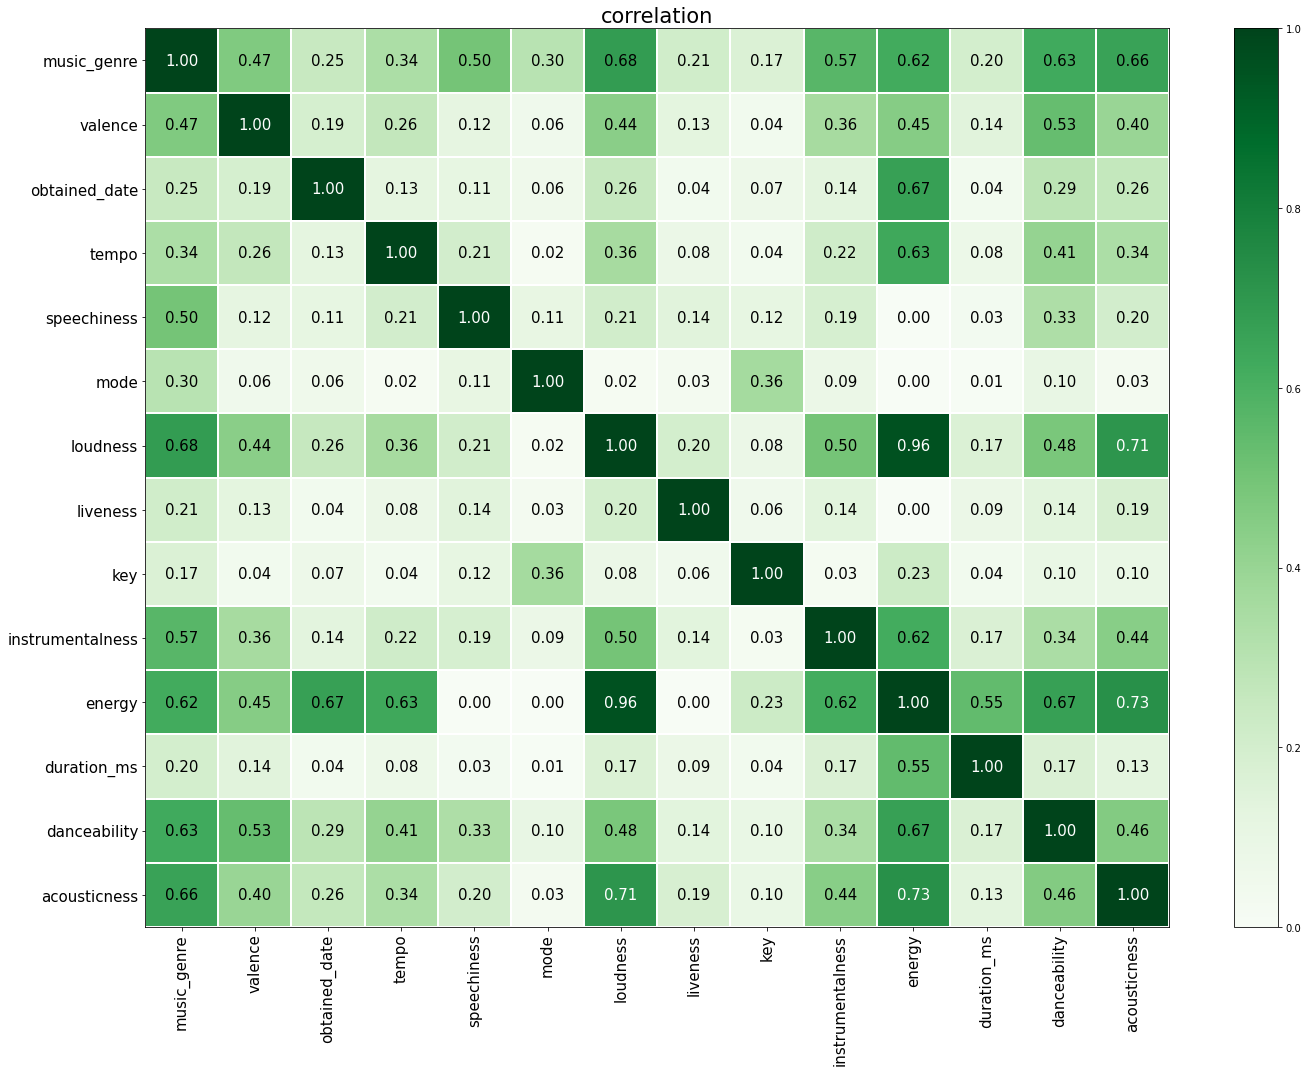

In [57]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        #title=, 
                        fontsize_factor=1.5, 
                        figsize=(20, 15))
plt.tight_layout()

Видны сильно коррелирующие между собой данные - `energy` и `loudness`. Один из них вероятно придется удалить после обработки пропусков. В остальных случаях коэффициент корреляции не превышает 0.8

## Исследовательский анализ данных

Посмотирм снова на пропуски в таблице

In [58]:
df_train_copy.isna().sum()

track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 697
liveness              0
loudness              0
mode                489
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

Пропусков стало немного меньше.
Но чтобы их заполнить, необходимо понимать как это делать, поэтому имеет смысл провести анализ данных

#### Acousticness

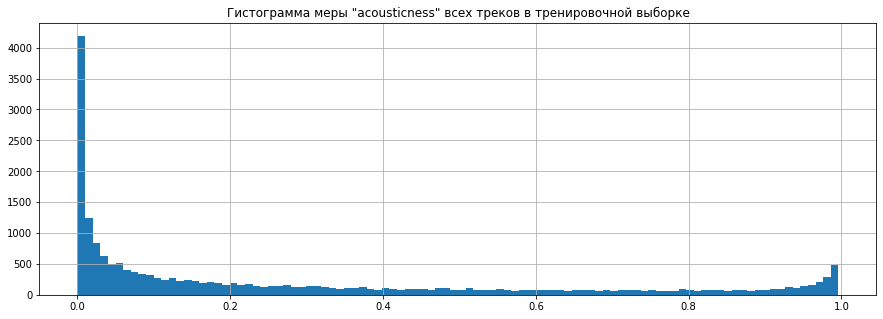

In [59]:
df_train_copy['acousticness'].hist(bins=100)
plt.title('Гистограмма меры "acousticness" всех треков в тренировочной выборке');

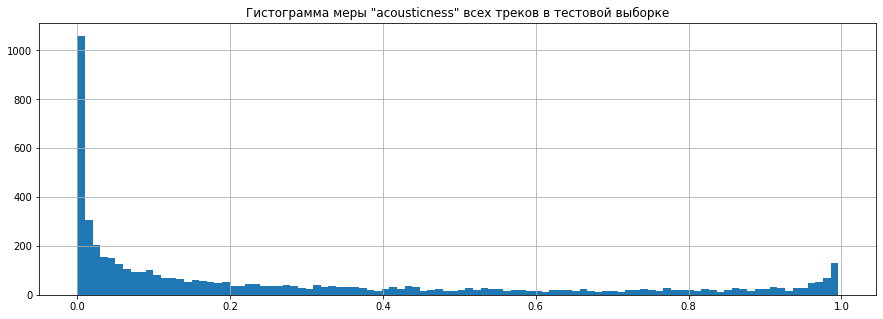

In [60]:
df_test['acousticness'].hist(bins=100)
plt.title('Гистограмма меры "acousticness" всех треков в тестовой выборке');

In [61]:
df_train_copy['acousticness'].describe()

count    19844.000000
mean         0.277255
std          0.323093
min          0.000000
25%          0.015400
50%          0.122000
75%          0.476000
max          0.996000
Name: acousticness, dtype: float64

Треки в основном не акустические

#### Danceability

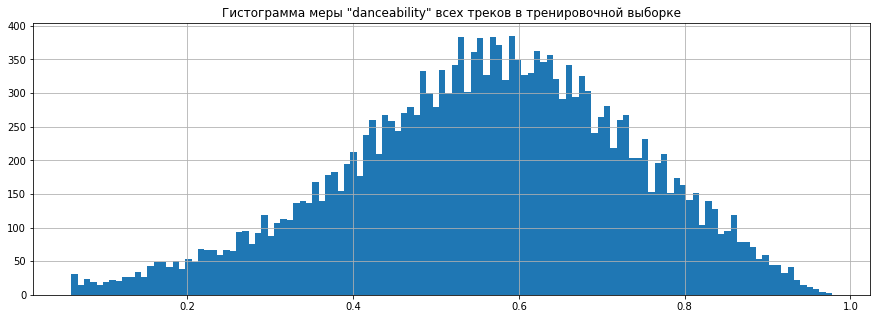

In [62]:
df_train_copy['danceability'].hist(bins=120)
plt.title('Гистограмма меры "danceability" всех треков в тренировочной выборке');

Распределение  близко к нормальному
Из выбросов разве что можно заметить небольшой выброс при значении `danceability`, близком к нулю. Наверно это какой-то определенный рок или классика, что-то в таком духе
В распределении в целом ниче

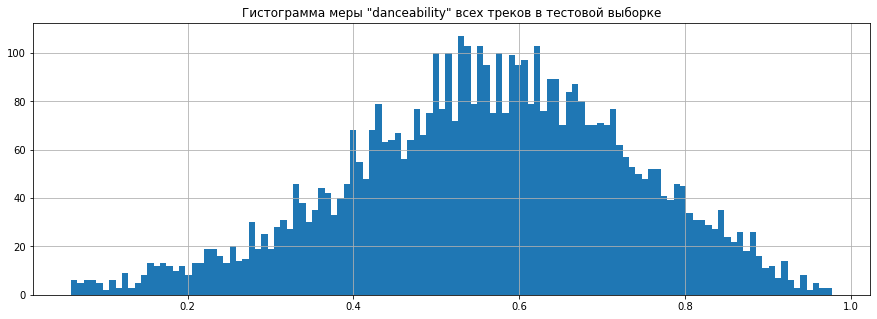

In [63]:
df_test['danceability'].hist(bins=120)
plt.title('Гистограмма меры "danceability" всех треков в тестовой выборке');

In [64]:
df_train_copy['danceability'].describe()

count    19844.000000
mean         0.560920
std          0.172153
min          0.060000
25%          0.450000
50%          0.569000
75%          0.682000
max          0.978000
Name: danceability, dtype: float64

#### Duration_ms

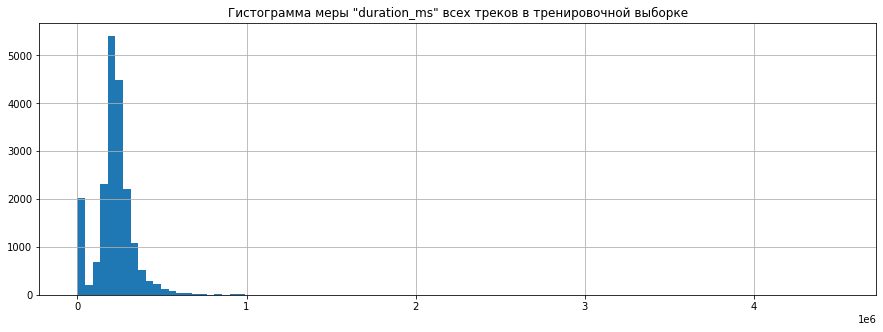

In [65]:
df_train_copy['duration_ms'].hist(bins=100)
plt.title('Гистограмма меры "duration_ms" всех треков в тренировочной выборке');

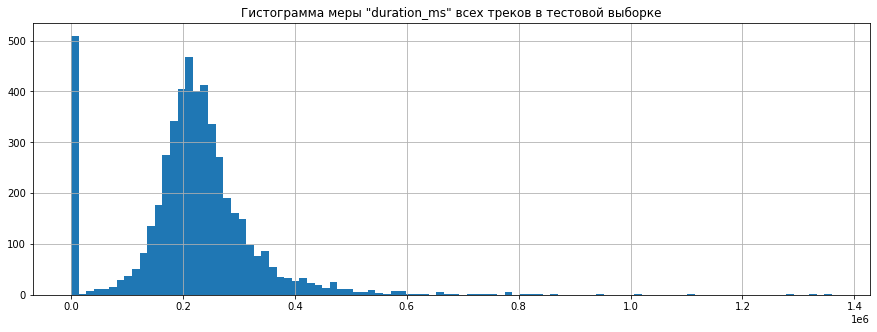

In [66]:
df_test['duration_ms'].hist(bins=100)
plt.title('Гистограмма меры "duration_ms" всех треков в тестовой выборке');

На гистограммах видно:
1) слишком много значений около 0
2) слишком большой хвост справа (выбросы)\
3) на тестовой выборке выбросы вправо не такие большие (максимальная длительность трека меньше)

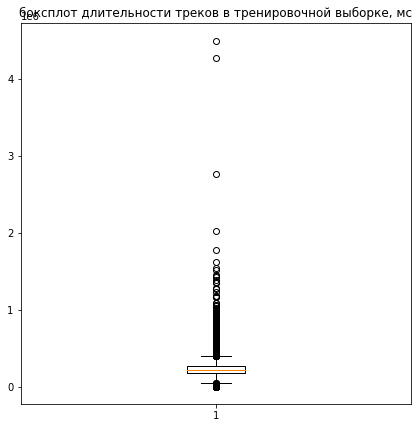

In [67]:
plt.figure(figsize=(7,7));
plt.boxplot(df_train_copy['duration_ms'])
plt.title('боксплот длительности треков в тренировочной выборке, мс');


In [68]:
df_train_copy['duration_ms'].describe()

count    1.984400e+04
mean     2.200973e+05
std      1.279836e+05
min     -1.000000e+00
25%      1.769035e+05
50%      2.193865e+05
75%      2.662805e+05
max      4.497994e+06
Name: duration_ms, dtype: float64

Видно, что минимальное значение длительности трека равно -1. Что явно указывает на ошибку в данных

Посмотрим на границы boxplot:

In [69]:
# межквартильный размах
df_train_copy['duration_ms'].describe()[6] - df_train_copy['duration_ms'].describe()[4]

89377.0

In [70]:
# верхняя граница
(df_train_copy['duration_ms'].describe()[6] + 
 1.5 * (df_train_copy['duration_ms'].describe()[6] - df_train_copy['duration_ms'].describe()[4])
)

400346.0

In [71]:
# нижняя граница
(1.5 * (df_train_copy['duration_ms'].describe()[6] - df_train_copy['duration_ms'].describe()[4]) - 
df_train_copy['duration_ms'].describe()[4]
)

-42838.0

По длительности треков видно огромное количество выбросов. 75 перцентиль - 266.2 секунд. Межквартильный размах равен 89377 мс. А выбросы начинаются при длительности треков свыше 400346 мс. Длительность треков меньше 0 мс, очевидно не может быть. Я бы даже поставил порог в 1000 мс. 

Допускаю, что на каком-нибудь альбоме может быть просто записан короткий звук

Посмотрим на гистограмму, изменив диапазон отображения по горизонтальной оси. 

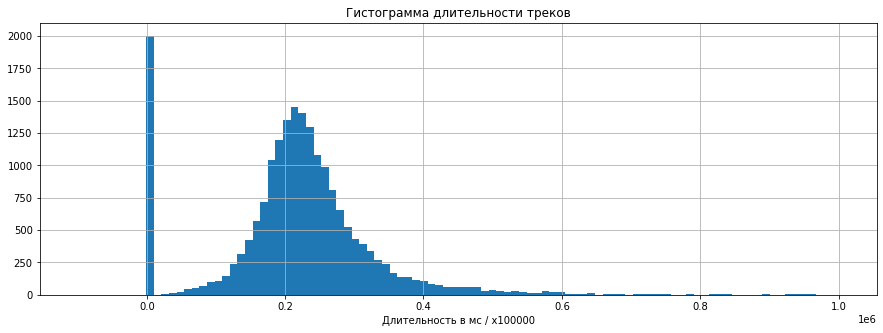

In [72]:
plt.hist(df_train_copy['duration_ms'], bins = 100, range=(-100000, 1000000))
plt.grid()
plt.title('Гистограмма длительности треков')
plt.xlabel('Длительность в мс / х100000');

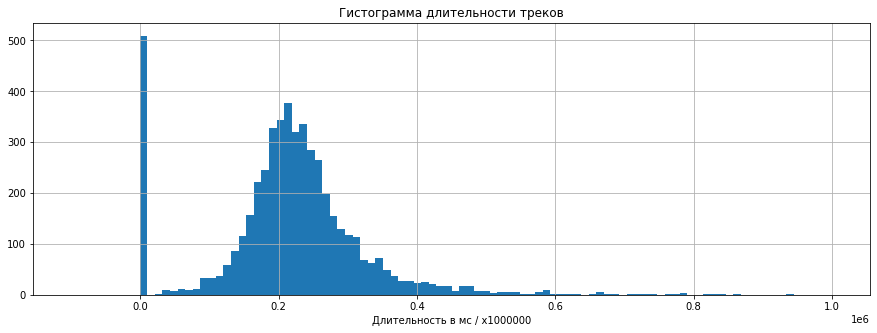

In [73]:
plt.hist(df_test['duration_ms'], bins = 100, range=(-100000, 1000000))
plt.grid()
plt.title('Гистограмма длительности треков')
plt.xlabel('Длительность в мс / х1000000');

Вызывает большой вопрос наличие огромного количества треков с длительностью меньше 0. Их слишком много. Посмотрим на эти треки

Аналогично ведут себя данные в тестовой выборке

In [74]:
df_train_copy[df_train_copy['duration_ms'] <= 0].head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
13,Iwanakutemo Tsutawaru Arewa Sukoshi Usoda - Al...,0.1100,0.470,-1.0,0.6410,0.000000,F#,0.155,-7.454,Major,0.0658,86.387,4-Apr,0.6380,Anime
26,"Serenade in B flat, K.361 ""Gran partita"": 3. A...",0.9910,0.154,-1.0,0.0384,0.902000,NaN,0.109,-26.909,Major,0.0405,68.199,4-Apr,0.0393,Classical
35,Flodgin,0.0848,0.748,-1.0,0.7120,0.000000,D,0.132,-5.651,Major,0.1430,140.055,4-Apr,0.1800,Rap
50,Things My Father Said,0.0540,0.482,-1.0,0.6270,0.000003,D,0.111,-5.779,Major,0.0300,95.903,4-Apr,0.1700,Alternative
55,"Fidelio, Op. 72, Act I: Ha! Welch ein Augenbli...",0.9090,0.374,-1.0,0.2270,0.000069,A#,0.686,-18.719,Major,0.0579,78.236,4-Apr,0.2640,Classical


Длительность таких треков равна -1. И это явная ошибка, которую надо исправить. **Устраним ее на этапе обработки пропусков**

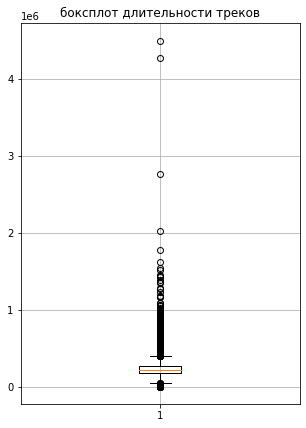

In [75]:
plt.figure(figsize=(5,7));
plt.boxplot(df_train_copy['duration_ms'])
plt.grid()
plt.title('боксплот длительности треков');


In [76]:
df_train_copy['duration_ms'].describe()

count    1.984400e+04
mean     2.200973e+05
std      1.279836e+05
min     -1.000000e+00
25%      1.769035e+05
50%      2.193865e+05
75%      2.662805e+05
max      4.497994e+06
Name: duration_ms, dtype: float64

In [77]:
# минимальная длительность трека в секундах
df_train_copy['duration_ms'].describe()['min'] / 1000 

-0.001

In [78]:
# минимальная длительность трека в часах
df_train_copy['duration_ms'].describe()['max'] / 1000 / 3600

1.2494427777777777

Межквартильный интервал теперь равен:

In [79]:
print('межквартильный интервал = ',df_train_copy['duration_ms'].describe()['75%'] - df_train_copy['duration_ms'].describe()['25%'], 'мc')

межквартильный интервал =  89377.0 мc


In [80]:
print('нижняя граница = ',(df_train_copy['duration_ms'].describe()['25%'] -
                            1.5 * (df_train_copy['duration_ms'].describe()['75%'] - df_train_copy['duration_ms'].describe()['25%'])),
     'мc')

нижняя граница =  42838.0 мc


In [81]:
print('верхняя граница = ',(df_train_copy['duration_ms'].describe()['75%'] +
                            1.5 * (df_train_copy['duration_ms'].describe()['75%'] - df_train_copy['duration_ms'].describe()['25%'])),
     'мc')

верхняя граница =  400346.0 мc


Минимальная длительность трека - 15.5 с, а максимальная 1.25 часа

К выбросам относятся треки длительностью меньше 1.5 минут и больше 6.18 минут.


Посчитаем количество треков, длительность которых выходит за нижний предел

В условии ниже стоит `(df_train_copy['duration_ms'] > 0)`, чтобы не учитывать данные, которые записаны заведомо с ошибкой

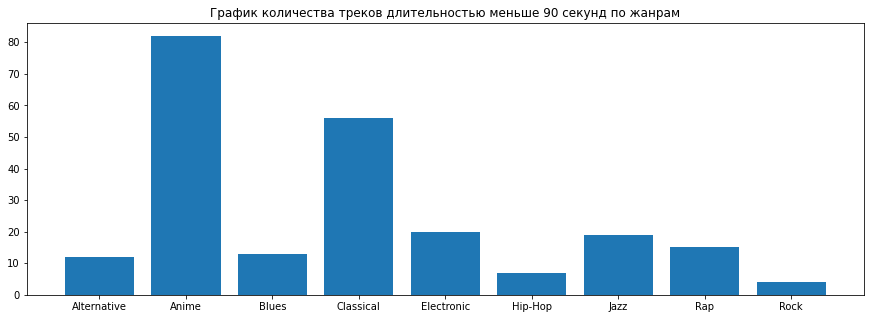

In [82]:
plt.bar(x = df_train_copy[(df_train_copy['duration_ms'] <= 90646.75) & 
                          (df_train_copy['duration_ms'] > 0)].pivot_table(index='music_genre', 
                                                                     values='duration_ms', 
                                                                     aggfunc='count')['duration_ms'].index,
        
        height = df_train_copy[(df_train_copy['duration_ms'] <= 90646.75) & 
                          (df_train_copy['duration_ms'] > 0)].pivot_table(index='music_genre', 
                                                                     values='duration_ms', 
                                                                     aggfunc='count')['duration_ms'])
plt.title('График количества треков длительностью меньше 90 секунд по жанрам');

In [83]:
df_train_copy[(df_train_copy['duration_ms'] <= 90646.75) & 
                          (df_train_copy['duration_ms'] > 0)].pivot_table(index='music_genre', 
                                                                     values='duration_ms', 
                                                                     aggfunc='count').sort_values(by='duration_ms', ascending=False)

,duration_ms
music_genre,
Anime,82
Classical,56
Electronic,20
Jazz,19
Rap,15
Blues,13
Alternative,12
Hip-Hop,7
Rock,4


Итак наиболее короткие треки - аниме, классика и электроника. Попробуем ограничить длительность трека 60 секундами:

In [84]:
df_train_copy[(df_train_copy['duration_ms'] <= 60000) & 
                          (df_train_copy['duration_ms'] > 0)].pivot_table(index='music_genre', 
                                                                     values='duration_ms', 
                                                                     aggfunc='count').sort_values(by='duration_ms', ascending=False)

,duration_ms
music_genre,
Classical,22
Anime,20
Electronic,9
Alternative,7
Blues,4
Hip-Hop,4
Rap,2
Jazz,1


Треков стало значительно меньше, поэтому я бы удалил все треки из датафрейма, длительность которых меньше 60 с. 

Аналогично рассмотрим треки, длительность которых выходит за пределы, согласно боксплоту. Максимальный предел - 6.18 секунд. Что в целом не очень долго

In [85]:
df_train_copy[(df_train_copy['duration_ms'] >= 371660.75)].pivot_table(index='music_genre', 
                                                                     values='duration_ms', 
                                                                     aggfunc='count').sort_values(by='duration_ms', ascending=False).sum()

duration_ms    1253
dtype: int64

Треков с длительностью 6.18 минут и более - 1253. Я бы поднял планку до 10 минут

<BarContainer object of 10 artists>

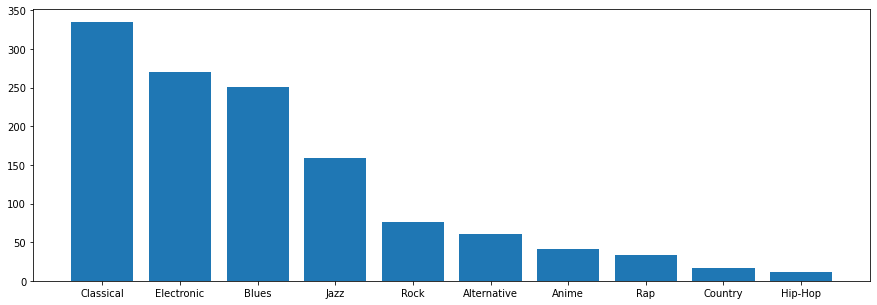

In [86]:
plt.bar(x = df_train_copy[(df_train_copy['duration_ms'] >= 371660.75)].pivot_table(index='music_genre', 
                                                                     values='duration_ms', 
                                                                     aggfunc='count').sort_values(by='duration_ms', ascending=False)['duration_ms'].index,
        
        height = df_train_copy[(df_train_copy['duration_ms'] >= 371660.75)].pivot_table(index='music_genre', 
                                                                     values='duration_ms', 
                                                                     aggfunc='count').sort_values(by='duration_ms', ascending=False)['duration_ms']

)

Теперь рассмотрим треки, длительность которых выходит за верхний предел

In [87]:
df_train_copy[df_train_copy['duration_ms'] >= 371660.75].count()

track_name          1253
acousticness        1253
danceability        1253
duration_ms         1253
energy              1253
instrumentalness    1253
key                 1216
liveness            1253
loudness            1253
mode                1223
speechiness         1253
tempo               1226
obtained_date       1253
valence             1253
music_genre         1253
dtype: int64

Всего треков с такой длительною 1253

Я бы ограничил длительность треков 10 минутами: 

In [88]:
df_train_copy[df_train_copy['duration_ms'] > 600000].count()

track_name          162
acousticness        162
danceability        162
duration_ms         162
energy              162
instrumentalness    162
key                 160
liveness            162
loudness            162
mode                159
speechiness         162
tempo               157
obtained_date       162
valence             162
music_genre         162
dtype: int64

Таких треков всего 162

Итог: удалим треки, длительность которых меньше 60 с, и более 600 с, то есть оставим треки длительность от 1 мин до 10 минут включительно. Как вариант, можно отрезать 1% данных по длительности слева и 1% справа. Посмотрим на квантили

In [89]:
print('0.01 квантиль:', df_train_copy['duration_ms'].quantile(0.01))
print('0.99 квантиль:', df_train_copy['duration_ms'].quantile(0.99))

0.01 квантиль: -1.0
0.99 квантиль: 581786.79


В таком случае уберем по 1% слева и справа

In [90]:
df_train_copy = df_train_copy[(df_train_copy['duration_ms'] >= df_train_copy['duration_ms'].quantile(0.01)) & 
                              (df_train_copy['duration_ms'] <= df_train_copy['duration_ms'].quantile(0.99))]

In [91]:
df_train_copy.shape

(19645, 15)

In [92]:
df_train_copy.isna().sum()

track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 694
liveness              0
loudness              0
mode                485
speechiness           0
tempo               437
obtained_date         0
valence               0
music_genre           0
dtype: int64

#### Energy

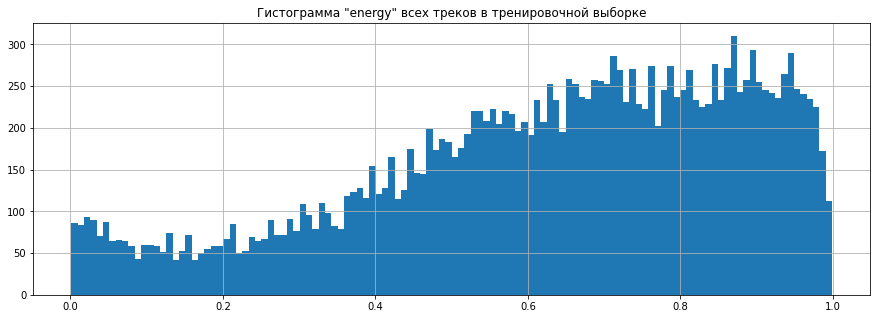

In [93]:
df_train_copy['energy'].hist(bins=120)
plt.title('Гистограмма "energy" всех треков в тренировочной выборке');

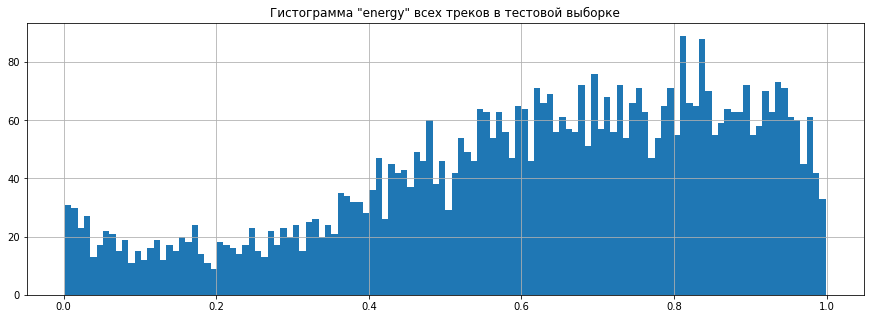

In [94]:
df_test['energy'].hist(bins=120)
plt.title('Гистограмма "energy" всех треков в тестовой выборке');

In [95]:
df_train_copy.groupby('music_genre').median()['energy'].sort_values(ascending=False)

music_genre
Anime          0.7980
Electronic     0.7720
Alternative    0.7500
Rock           0.7150
Country        0.6680
Hip-Hop        0.6540
Rap            0.6460
Blues          0.6355
Jazz           0.4720
Classical      0.1010
Name: energy, dtype: float64

Картина не выглядит противоречивой. Классическая музыка, джаз и блюз действительно не являются энергичными. Рэп и хип-хоп где-то посередине, а электронная музыка, альтернатива и рок набиолее энергичные. 
Распределение здесь и не должно быть похожим на нормальное, поэтому кажется, что все логично

In [96]:
# df_train_copy['median_energy'] = df_train_copy.groupby('music_genre')['energy'].transform('median')
# df_train_copy

#### Instrumentalness

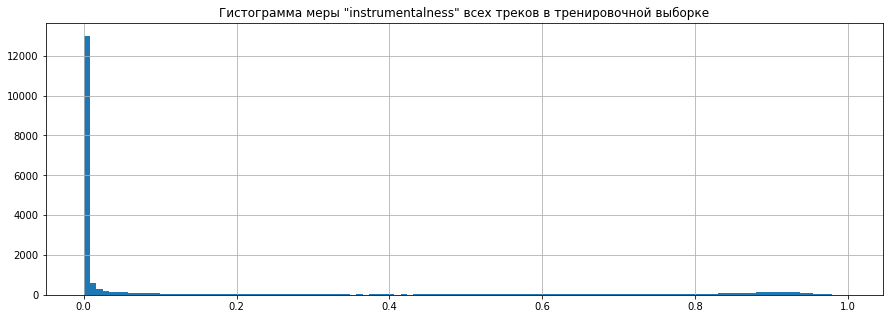

In [97]:
df_train_copy['instrumentalness'].hist(bins=120)
plt.title('Гистограмма меры "instrumentalness" всех треков в тренировочной выборке');

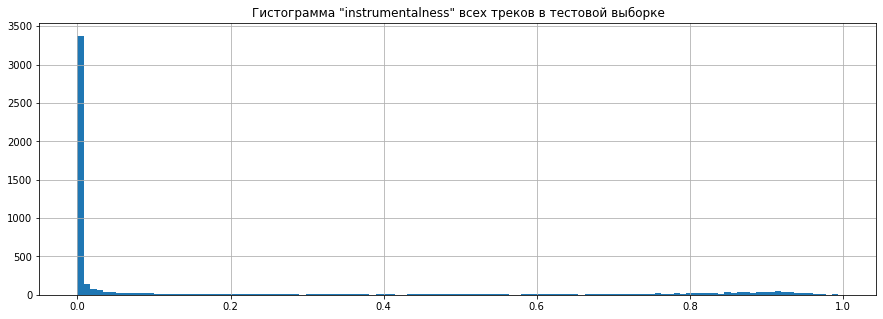

In [98]:
df_test['instrumentalness'].hist(bins=120)
plt.title('Гистограмма "instrumentalness" всех треков в тестовой выборке');

In [99]:
df_train_copy.groupby('music_genre').median()['instrumentalness'].sort_values(ascending=False)

music_genre
Classical      0.838000
Electronic     0.173000
Jazz           0.135000
Blues          0.000923
Anime          0.000251
Alternative    0.000069
Rock           0.000047
Country        0.000001
Hip-Hop        0.000000
Rap            0.000000
Name: instrumentalness, dtype: float64

Значение 0 в `instrumentalness` указывает на то, что трек вокальный, а 1 - то, что вокала нет. В классической музыке вокала нет, поэтому значение для классической музыки близко к единице. В остальных жанрах практически во всех есть голос

Здесь снова я бы не стал говорить о выбросах

#### Key

In [100]:
df_train_copy['key'].unique()

array(['D', 'A', 'E', 'G#', 'C', 'D#', 'A#', 'F', 'F#', nan, 'G', 'C#',
       'B'], dtype=object)

In [101]:
df_train_copy.isna().sum()

track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 694
liveness              0
loudness              0
mode                485
speechiness           0
tempo               437
obtained_date         0
valence               0
music_genre           0
dtype: int64

Пропусков в `key` - 687

In [102]:
df_train_copy[(df_train_copy['key'].isna()==True) & (df_train_copy['mode'].isna() == True)].count()

track_name          19
acousticness        19
danceability        19
duration_ms         19
energy              19
instrumentalness    19
key                  0
liveness            19
loudness            19
mode                 0
speechiness         19
tempo               19
obtained_date       19
valence             19
music_genre         19
dtype: int64

Треков, где не указаны одновременно ключ и модальность, всего 19. При заполнении пропусков учтем это

In [103]:
df_train_copy.pivot_table(index='key', columns='mode', values='energy', aggfunc='count') # .loc[:]['Major']

mode,Major,Minor
key,,
A,1170,723
A#,517,630
B,638,783
C,1609,410
C#,1429,565
D,1589,397
D#,356,212
E,647,787
F,810,708


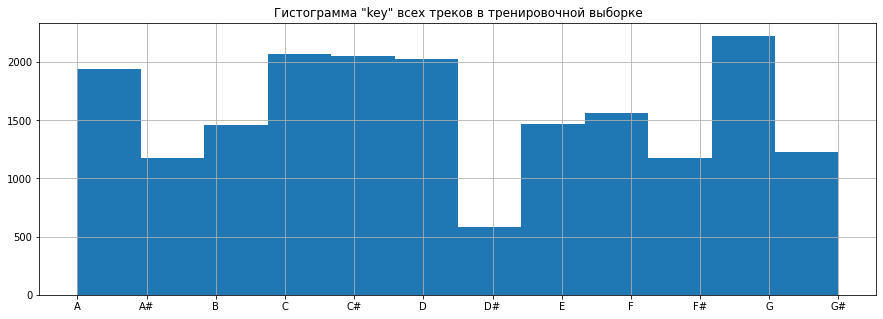

In [104]:
df_train_copy['key'].sort_values(ascending=True).hist(bins=12)
plt.title('Гистограмма "key" всех треков в тренировочной выборке');

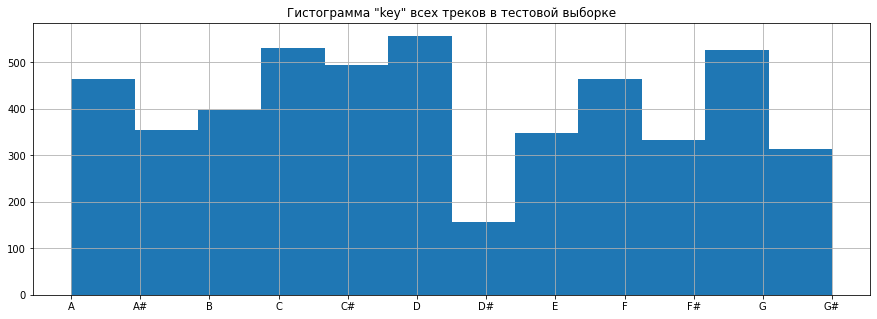

In [105]:
df_test['key'].sort_values(ascending=True).hist(bins=12)
plt.title('Гистограмма "key" всех треков в тестовой выборке');

#### Liveness

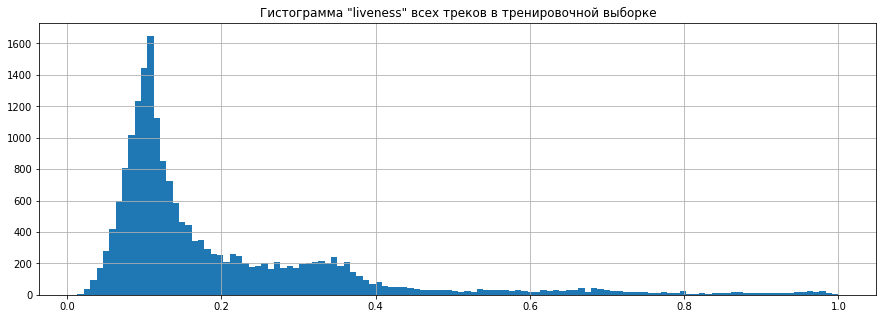

In [106]:
df_train_copy['liveness'].hist(bins=120)
plt.title('Гистограмма "liveness" всех треков в тренировочной выборке');

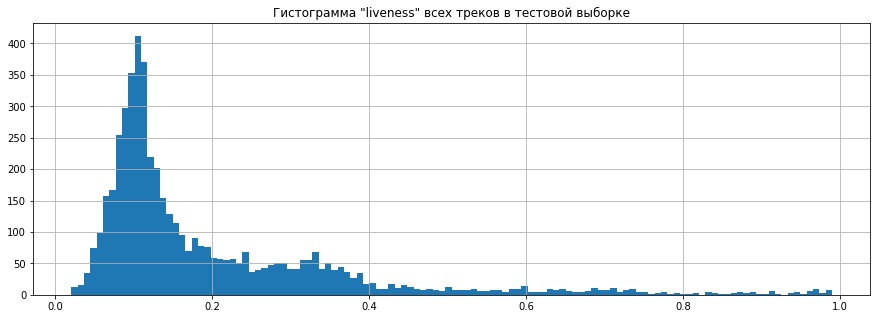

In [107]:
df_test['liveness'].hist(bins=120)
plt.title('Гистограмма "liveness" всех треков в тестовой выборке');

In [108]:
df_train_copy.groupby('music_genre').median()['liveness'].sort_values(ascending=False)

music_genre
Blues          0.1410
Anime          0.1390
Hip-Hop        0.1360
Alternative    0.1350
Rap            0.1335
Country        0.1290
Electronic     0.1280
Rock           0.1270
Jazz           0.1160
Classical      0.1110
Name: liveness, dtype: float64

`liveness` показывает вероятность того, что трек исполняется вживую. На мой взгляд, на жанр это особо не влияет, что показывают медианные значения этого показателя, и в модели этот фактор имеет смысл не учитывать


#### loudness

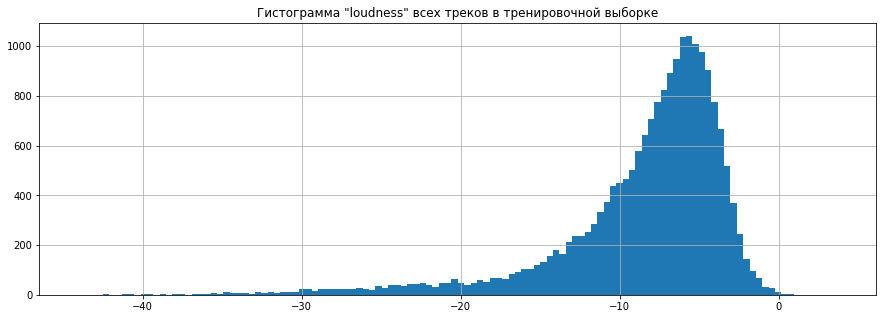

In [109]:
df_train_copy['loudness'].hist(bins=120)
plt.title('Гистограмма "loudness" всех треков в тренировочной выборке');

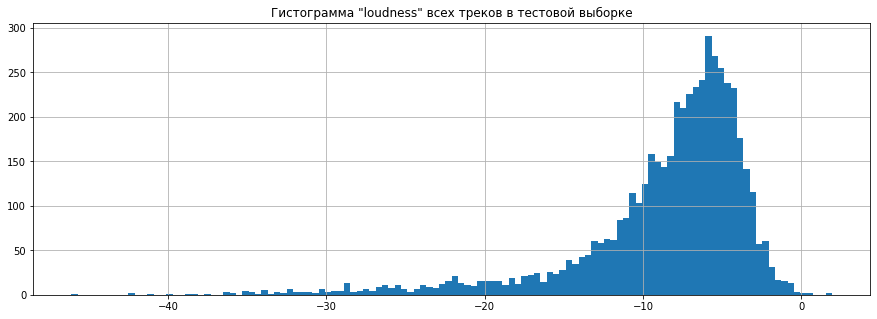

In [110]:
df_test['loudness'].hist(bins=120)
plt.title('Гистограмма "loudness" всех треков в тестовой выборке');

In [111]:
df_train_copy.groupby('music_genre').median()['loudness'].sort_values(ascending=False)

music_genre
Anime          -5.6185
Alternative    -6.0410
Electronic     -6.3740
Rap            -6.3865
Country        -6.4870
Rock           -6.5250
Hip-Hop        -6.5875
Blues          -8.3950
Jazz          -10.4040
Classical     -22.0265
Name: loudness, dtype: float64

Не совсем понятно, почему значения отрицательные, но видно, что жанры расположены  в логичном порядке с точки зрения громкости.

#### Mode

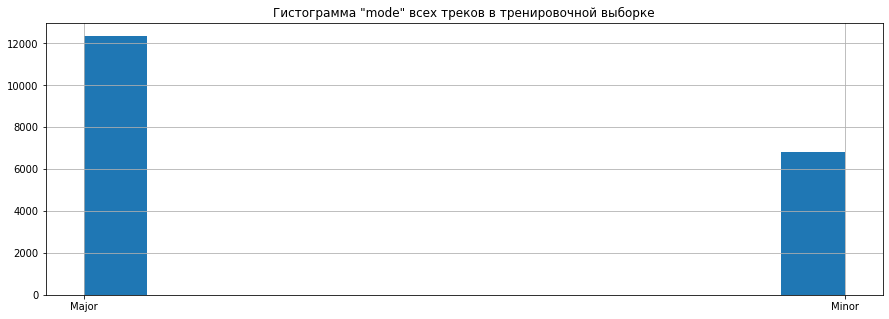

In [112]:
df_train_copy['mode'].sort_values(ascending=True).hist(bins=12)
plt.title('Гистограмма "mode" всех треков в тренировочной выборке');

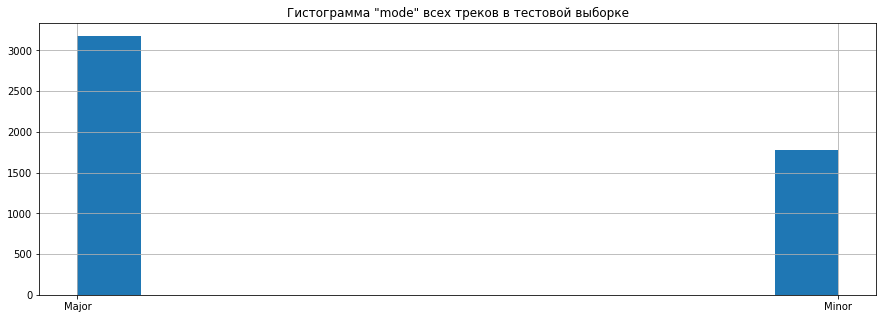

In [113]:
df_test['mode'].sort_values(ascending=True).hist(bins=12)
plt.title('Гистограмма "mode" всех треков в тестовой выборке');

Мажорных треков больше

#### Spechiness

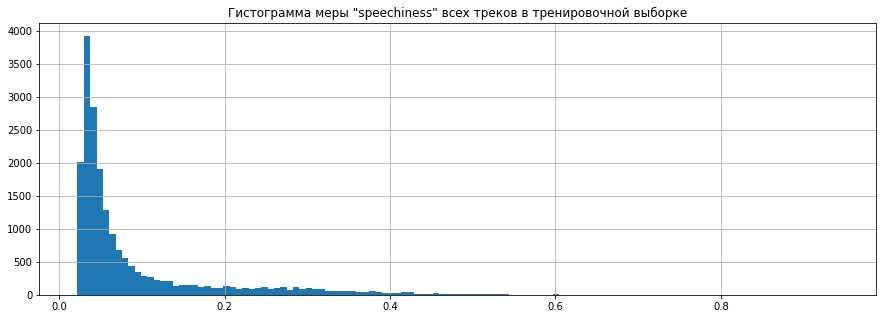

In [114]:
df_train_copy['speechiness'].hist(bins=120)
plt.title('Гистограмма меры "speechiness" всех треков в тренировочной выборке');

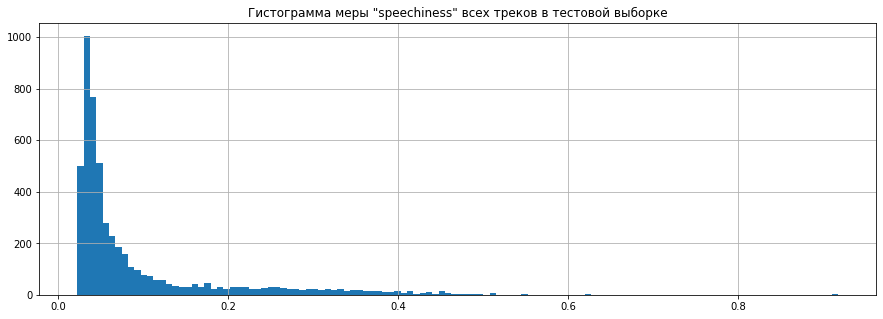

In [115]:
df_test['speechiness'].hist(bins=120)
plt.title('Гистограмма меры "speechiness" всех треков в тестовой выборке');

#### tempo

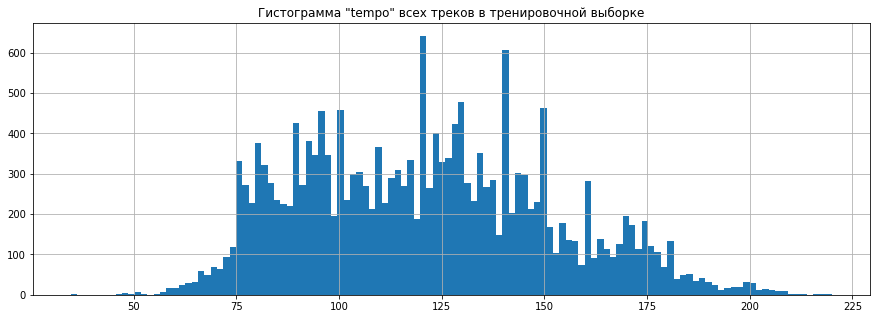

In [116]:
df_train_copy['tempo'].hist(bins=120)
plt.title('Гистограмма "tempo" всех треков в тренировочной выборке');

Выбросы понятны, поскольку музыка часто пишется с каким-то конкретным темпом, вроде 120 или 140 ударов в минуту 

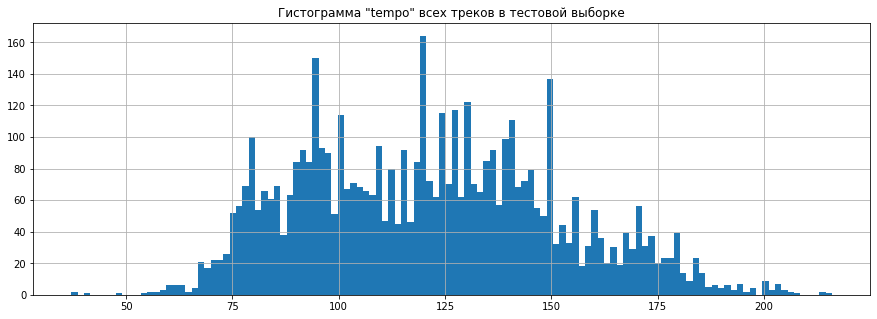

In [117]:
df_test['tempo'].hist(bins=120)
plt.title('Гистограмма "tempo" всех треков в тестовой выборке');

In [118]:
df_train_copy['tempo'] = df_train_copy['tempo'].round()

Вообще темп должен быть целым, а не дробным

In [119]:
df_train_copy['tempo'].round()
df_test['tempo'].round();

#### Obtained_date

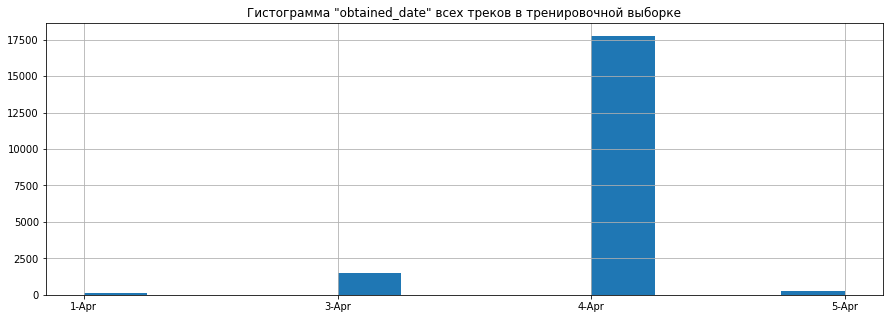

In [120]:
df_train_copy['obtained_date'].sort_values(ascending=True).hist(bins=12)
plt.title('Гистограмма "obtained_date" всех треков в тренировочной выборке');

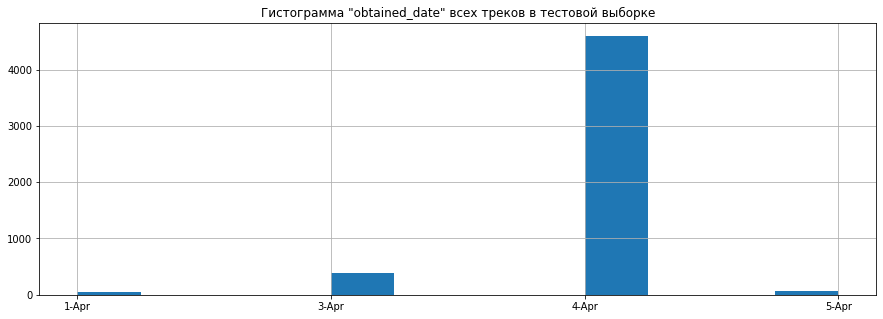

In [121]:
df_test['obtained_date'].sort_values(ascending=True).hist(bins=12)
plt.title('Гистограмма "obtained_date" всех треков в тестовой выборке');

In [122]:
df_train_copy['obtained_date'].value_counts()

4-Apr    17752
3-Apr     1468
5-Apr      284
1-Apr      141
Name: obtained_date, dtype: int64

Большинство треков добавлено 4 апреля. Скорее всего смысла в этом признаке тоже нет

#### Valence

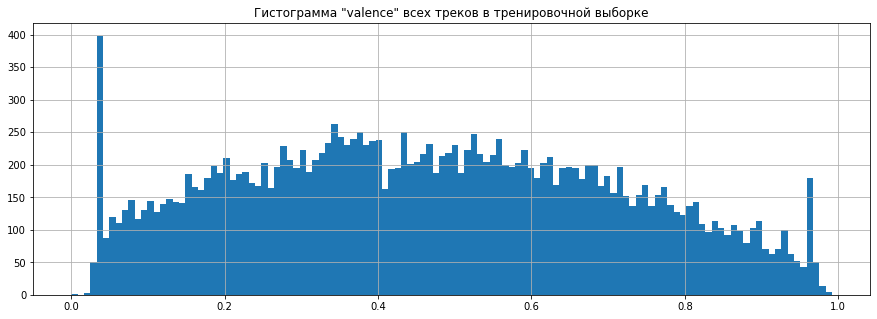

In [123]:
df_train_copy['valence'].hist(bins=120)
plt.title('Гистограмма "valence" всех треков в тренировочной выборке');

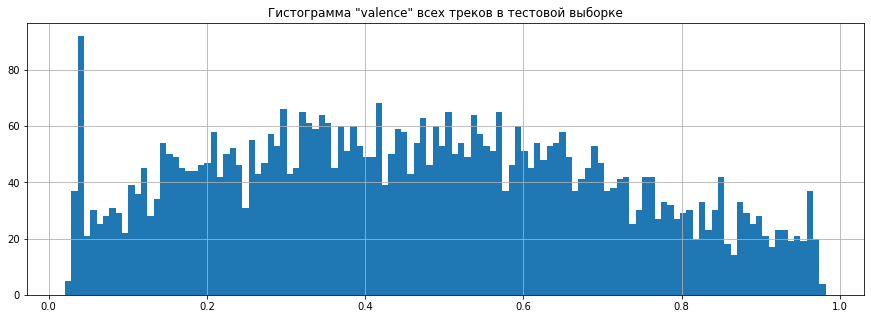

In [124]:
df_test['valence'].hist(bins=120)
plt.title('Гистограмма "valence" всех треков в тестовой выборке');

Видны выбросы. Проанализируем `valence` по жанрам

In [125]:
df_train_copy['valence'].value_counts()

0.3380    47
0.3240    43
0.3720    40
0.5440    38
0.9610    38
          ..
0.0402     1
0.0539     1
0.0623     1
0.0951     1
0.0000     1
Name: valence, Length: 1432, dtype: int64

In [126]:
genres_list = df_train_copy['music_genre'].unique()

In [127]:
genres_list

array(['Country', 'Rock', 'Alternative', 'Hip-Hop', 'Blues', 'Jazz',
       'Electronic', 'Anime', 'Rap', 'Classical'], dtype=object)

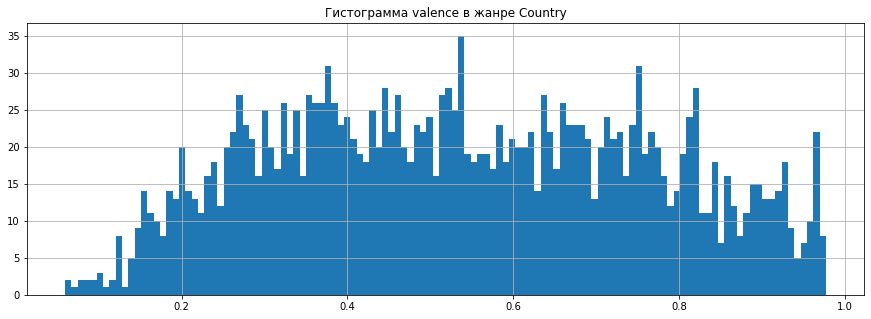

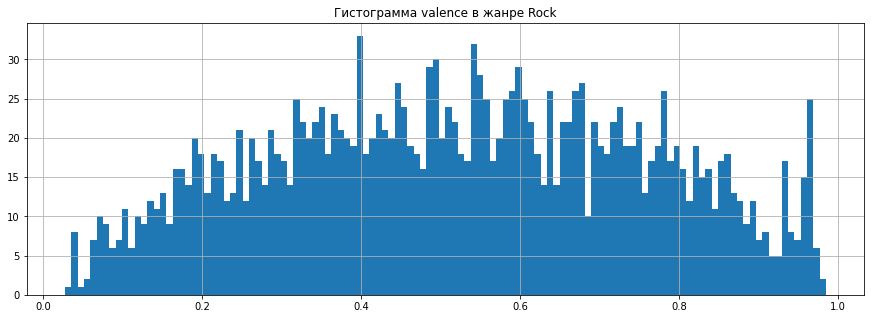

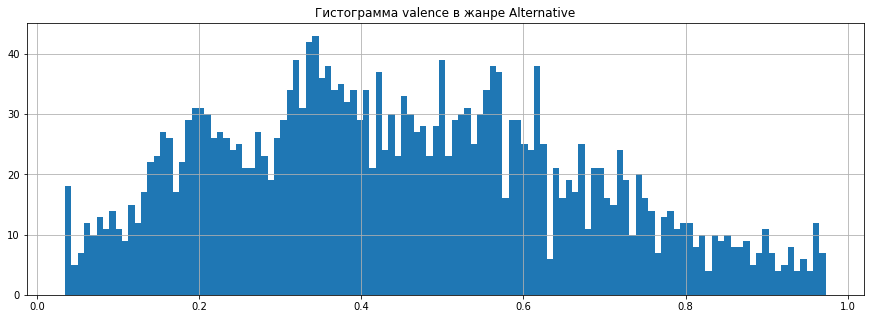

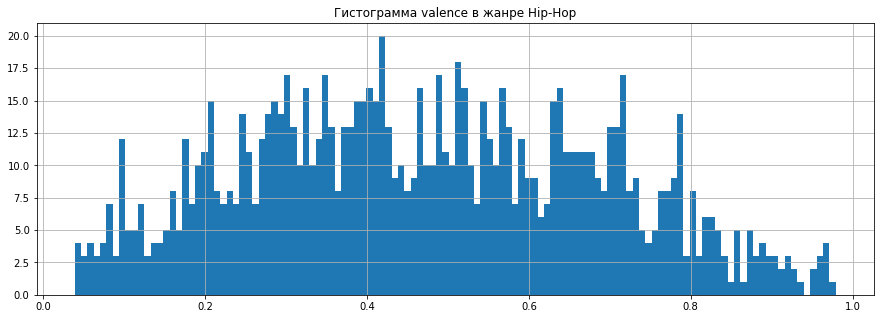

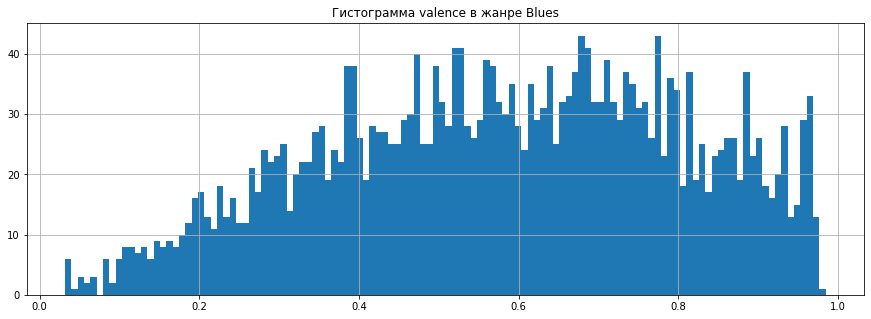

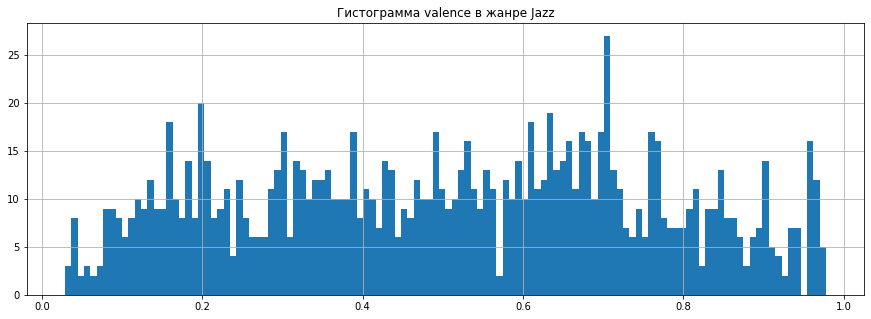

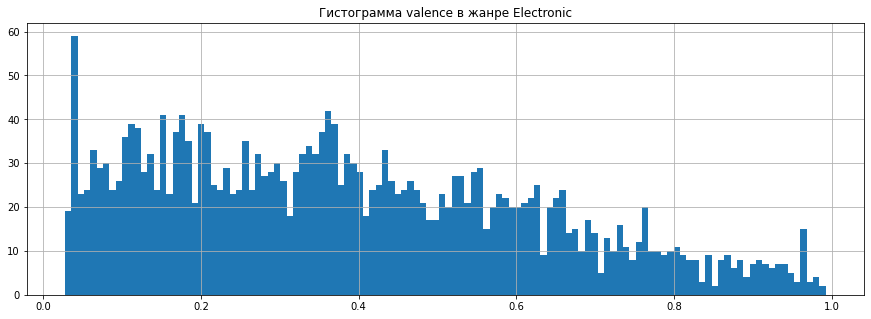

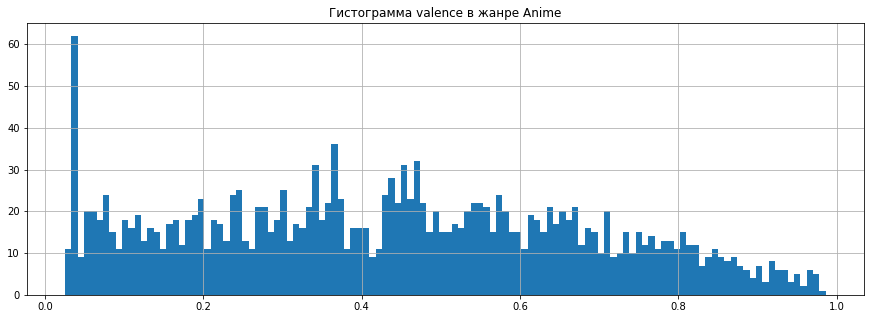

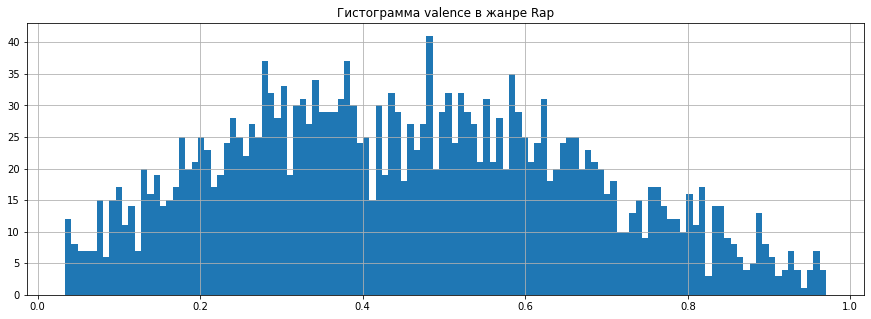

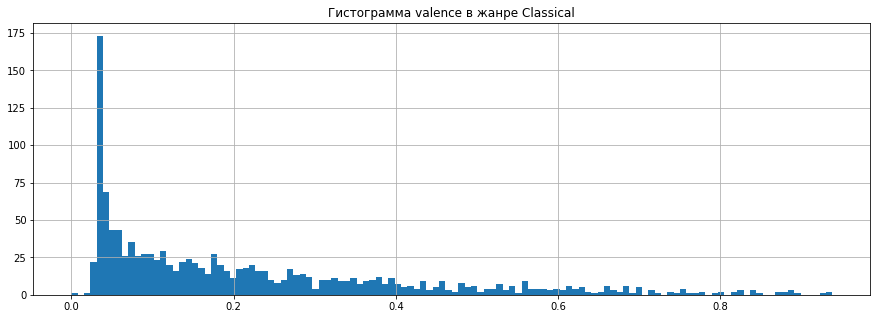

In [128]:
for genre in genres_list:
    ax = df_train_copy['valence'][df_train_copy['music_genre']== genre].hist(bins=120)
    plt.title(f'Гистограмма valence в жанре {genre}')
    plt.show()
    

Видны явно выбросы в начале и в конце некоторых жанрах. Возможно причина в работе модели, которая трекам присваивала значение `valence`. Попробуем округлить до 1 значащей цифры после запятой

In [129]:
df_train_copy['valence'] = df_train_copy['valence'].round(1)
df_test['valence'] = df_test['valence'].round(1)

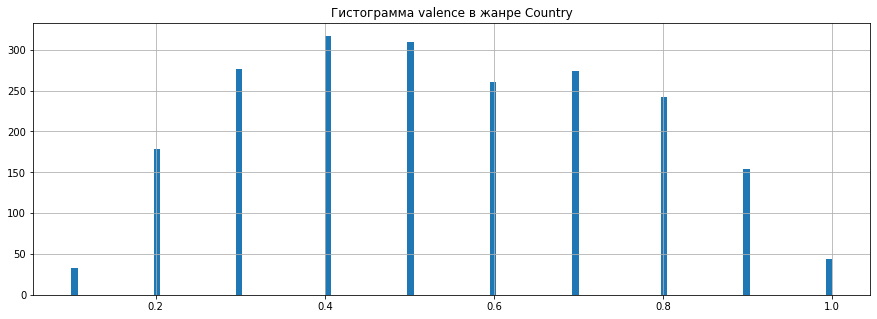

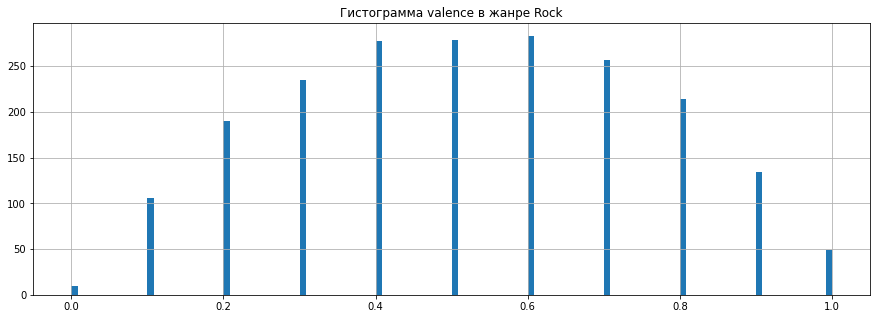

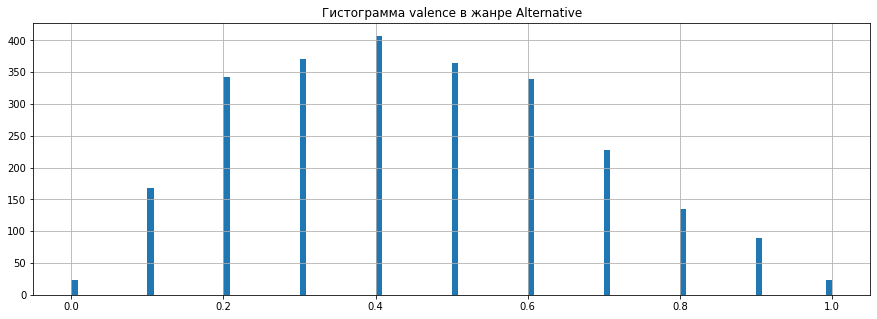

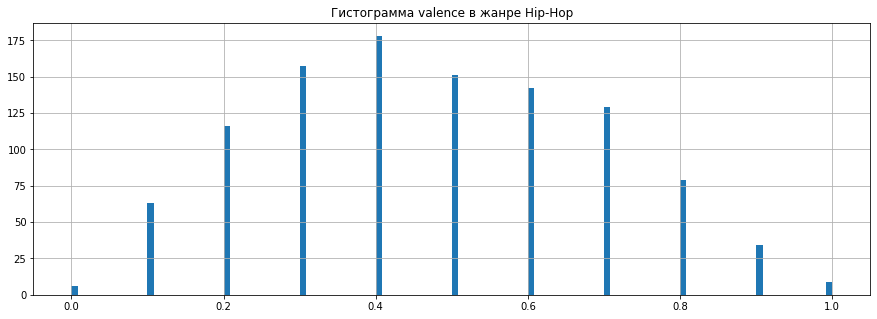

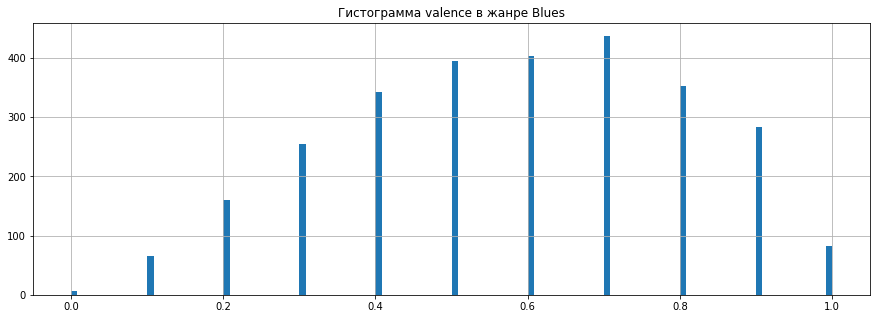

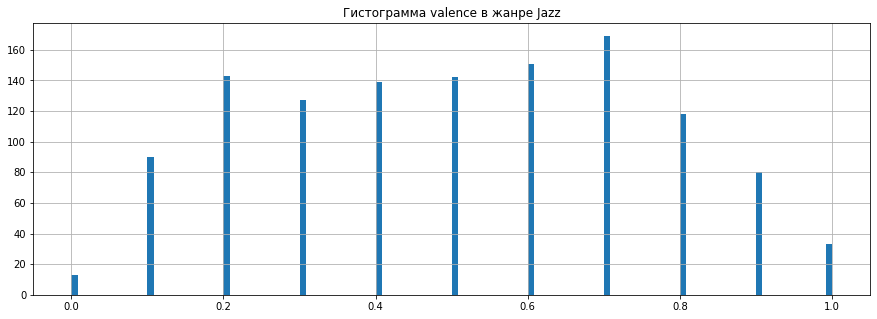

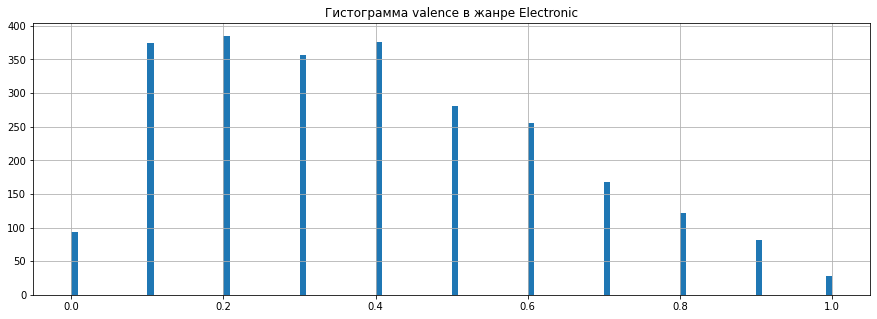

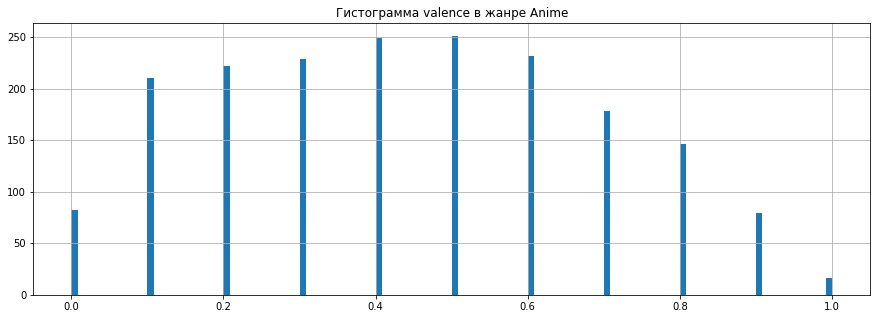

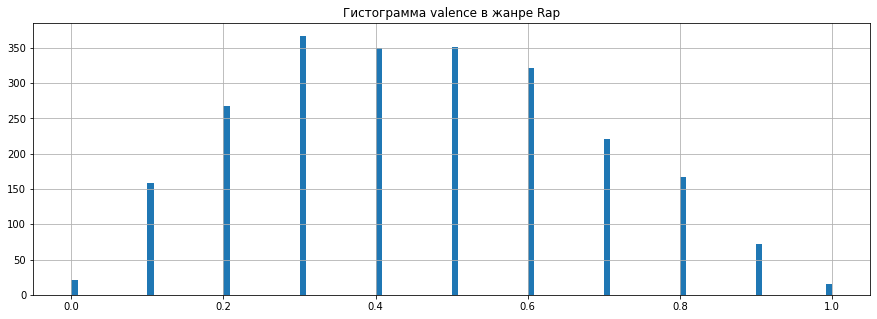

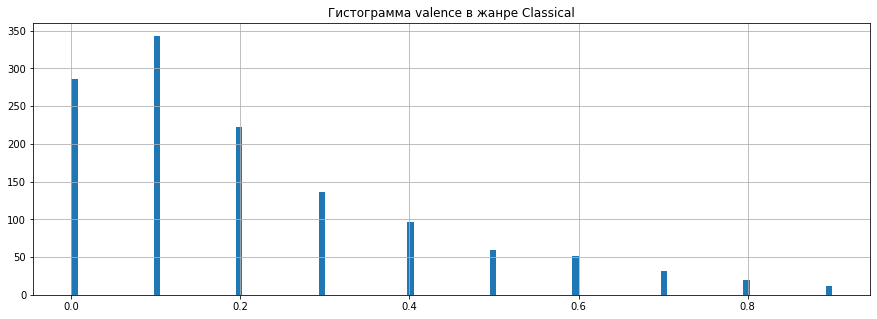

In [130]:
for genre in genres_list:
    ax = df_train_copy['valence'][df_train_copy['music_genre']== genre].hist(bins=120)
    plt.title(f'Гистограмма valence в жанре {genre}')
    plt.show()

Стало намного логичнее. Классическая музыка в среднем более грустная (значение `valence` ближе к 1, остальные жанры повеселее). Выведем заново гистограмму `valence` для тренировочной выборки для всех треков

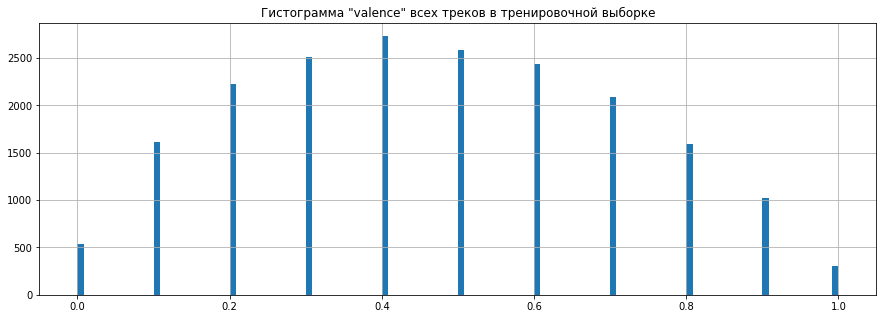

In [131]:
df_train_copy['valence'].hist(bins=120)
plt.title('Гистограмма "valence" всех треков в тренировочной выборке');

### Заполнение пропусков и удаление выбросов

In [132]:
df_train_copy.isna().sum()

track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 694
liveness              0
loudness              0
mode                485
speechiness           0
tempo               437
obtained_date         0
valence               0
music_genre           0
dtype: int64

И так необходимо заполнить пропущенные значения и устранить выброс в столбце `durations_ms`

#### Пропуски в `tempo`

Пропуски в `tempo` будем заполнять с помощью KNNImputer. Обучать KNNImputer будем на тренировочной выборке по столбцам, с которыми `tempo` больше коррелирует:

    1) 'acousticness'
    2) 'danceability'
    3) 'energy'
    4) 'loudness'
    5) 'valence'


In [133]:
df_train_copy.columns

Index(['track_name', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [134]:
df_train_copy.loc[:, ['acousticness', 
                      'danceability', 
                      'energy',
                      'loudness', 
                      'tempo', 
                      'valence']].head(3)

,acousticness,danceability,energy,loudness,tempo,valence
0,0.480,0.670,0.351,-16.842,101.0,0.4
1,0.243,0.452,0.670,-8.392,113.0,0.5
2,0.228,0.454,0.804,-5.225,81.0,0.3


In [135]:
df_train_copy.loc[:, ['acousticness', 
                      'danceability', 
                      'energy',
                      'loudness', 
                      'tempo', 
                      'valence']].isna().sum()

acousticness      0
danceability      0
energy            0
loudness          0
tempo           437
valence           0
dtype: int64

In [136]:
knn_imputer_tempo = KNNImputer(#missing_values=-1,
                        n_neighbors=50)
df_train_copy.loc[:, ['acousticness', 
                      'danceability', 
                      'energy',
                      'loudness', 
                      'tempo', 
                      'valence']] = knn_imputer_tempo.fit_transform(df_train_copy.loc[:, ['acousticness', 
                                                                                      'danceability', 
                                                                                      'energy',
                                                                                      'loudness', 
                                                                                      'tempo', 
                                                                                      'valence']])

In [137]:
df_train_copy.loc[:, ['acousticness', 
                      'danceability', 
                      'energy',
                      'loudness', 
                      'tempo', 
                      'valence']].isna().sum()

acousticness    0
danceability    0
energy          0
loudness        0
tempo           0
valence         0
dtype: int64

Пропуски в `tempo` заполнены

#### Исправление значений в `duration_ms`

Неправильные значения, которые равны -1, в `duration_ms` будем также заполнять с помощью KNNImputer. Только для их исправления возьмем все численные признаки таблицы

In [138]:
df_train_copy[numerical_cols].columns

Index(['acousticness', 'danceability', 'duration_ms', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

Снова посмотрим на гистограмму `duration_ms`

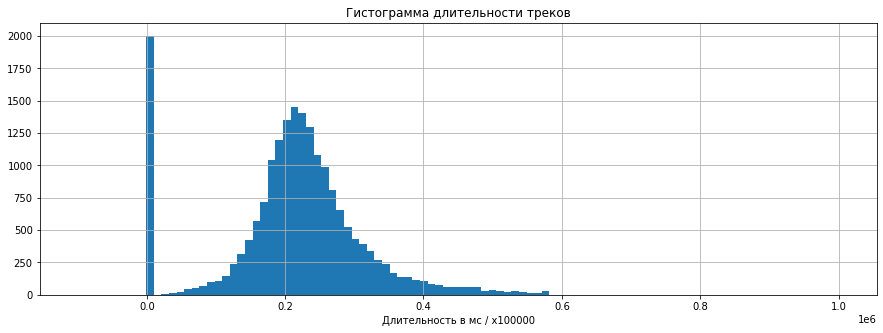

In [139]:
plt.hist(df_train_copy['duration_ms'], bins = 100, range=(-100000, 1000000))
plt.grid()
plt.title('Гистограмма длительности треков')
plt.xlabel('Длительность в мс / х100000');

In [140]:
knn_imputer_duration = KNNImputer(missing_values=-1,
                        n_neighbors=50)
df_train_copy[numerical_cols] = knn_imputer_duration.fit_transform(df_train_copy[numerical_cols])

Выведем обновленную гистограмму

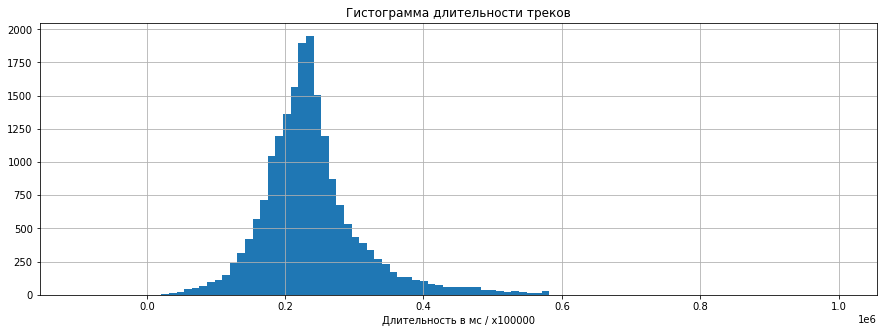

In [141]:
plt.hist(df_train_copy['duration_ms'], bins = 100, range=(-100000, 1000000))
plt.grid()
plt.title('Гистограмма длительности треков')
plt.xlabel('Длительность в мс / х100000');

Данные исправлены

#### Заполнение пропусков в `mode` и `key`

Для заполения пропусков в столбцах `mode` и `key` воспользуемся обычным методом `.fillna` и укажем параметр `(method='ffill')`.

Использовать именно этот метод будем для того, чтобы не влиять на частоту встречаемости каждого значения

In [142]:
df_train_copy['mode'].value_counts()

Major    12352
Minor     6808
Name: mode, dtype: int64

In [143]:
df_train_copy['mode'] = df_train_copy['mode'].fillna(method='ffill')

In [144]:
df_train_copy['mode'].value_counts()

Major    12672
Minor     6973
Name: mode, dtype: int64

In [145]:
df_train_copy['key'].value_counts()

G     2224
C     2068
C#    2050
D     2024
A     1940
F     1562
E     1469
B     1459
G#    1226
A#    1175
F#    1174
D#     580
Name: key, dtype: int64

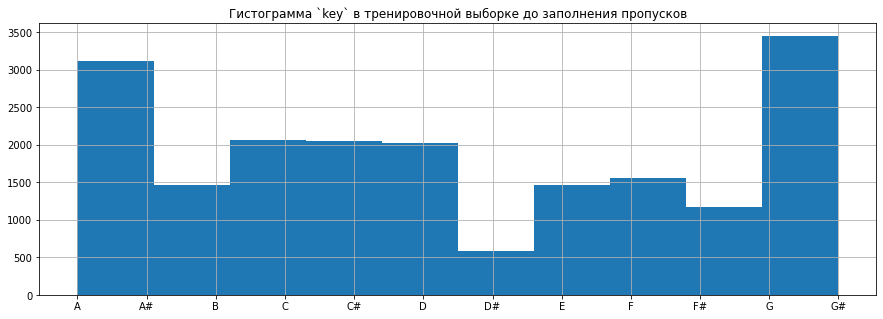

In [146]:
df_train_copy['key'].sort_values().hist()
plt.title('Гистограмма `key` в тренировочной выборке до заполнения пропусков');

In [147]:
# Заполнение пропусков
df_train_copy['key'] = df_train_copy['key'].fillna(method='ffill')

In [148]:
df_train_copy['key'].value_counts()

G     2322
C     2153
C#    2120
D     2106
A     2001
F     1610
E     1526
B     1506
G#    1270
F#    1220
A#    1218
D#     593
Name: key, dtype: int64

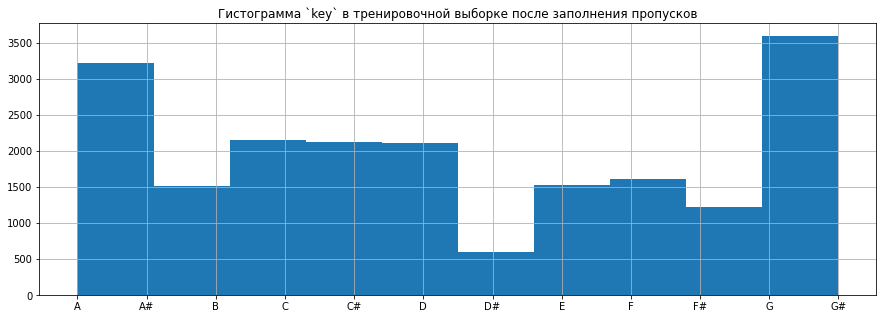

In [149]:
df_train_copy['key'].sort_values().hist()
plt.title('Гистограмма `key` в тренировочной выборке после заполнения пропусков');

Гистограмма не изменилась за счет применения KNN Imputer

Если бы заполняли модой или константой, то появился бы выброс

На первый взгляд такой вариант лучше

### Итог предобработки

In [150]:
df_train_copy.isna().sum()

track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

1) Пропуски устранены в столбцах `tempo`, `key` и `mode`
2) Устранены неверные значения в столбце `duration_ms`
3) Значения в `valence` округлены до 1 значащей цифры после запятой, что позволило устранить выбросы 

### Исправление тестовой выборки

#### Mode и Key

Столбцы `mode` и `key` заполняем методом `.fillna(method='ffill')`

In [151]:
df_test['mode'] = df_test['mode'].fillna(method='ffill')
df_test['key'] = df_test['key'].fillna(method='ffill')

#### Tempo

Пропуски в `tempo` заполняем `knn imputer` по уже обученной тренировочной выборке

In [152]:
df_test.loc[:, ['acousticness', 
                      'danceability', 
                      'energy',
                      'loudness', 
                      'tempo', 
                      'valence']] = knn_imputer_tempo.transform(df_test.loc[:, ['acousticness', 
                                                                                      'danceability', 
                                                                                      'energy',
                                                                                      'loudness', 
                                                                                      'tempo', 
                                                                                      'valence']])

#### Duration_ms

Неправильные значения в `durations_ms` исправляем тоже с помощью `knn imputer`

In [153]:
df_test[numerical_cols] = knn_imputer_duration.transform(df_test[numerical_cols])

In [154]:
df_test.isna().sum()

instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
dtype: int64

## Корреляция 2.0

Посмотрим снова на корреляцию

In [155]:
%%time
phik_overview = (df_train_copy
#                  [
#     (df_train_copy['music_genre'] == 'Rap') | 
#    (df_train_copy['music_genre'] == 'Blues')
#                                 ]
                 .drop('track_name', axis=1).phik_matrix(interval_cols=numerical_cols)
                )


C:\Users\Alexander\practicum\practicum_env\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable energy is large: 1498. Are you sure this is not an interval variable? Analysis for pairs of variables including energy can be slow.
  warnings.warn(


Wall time: 2.16 s


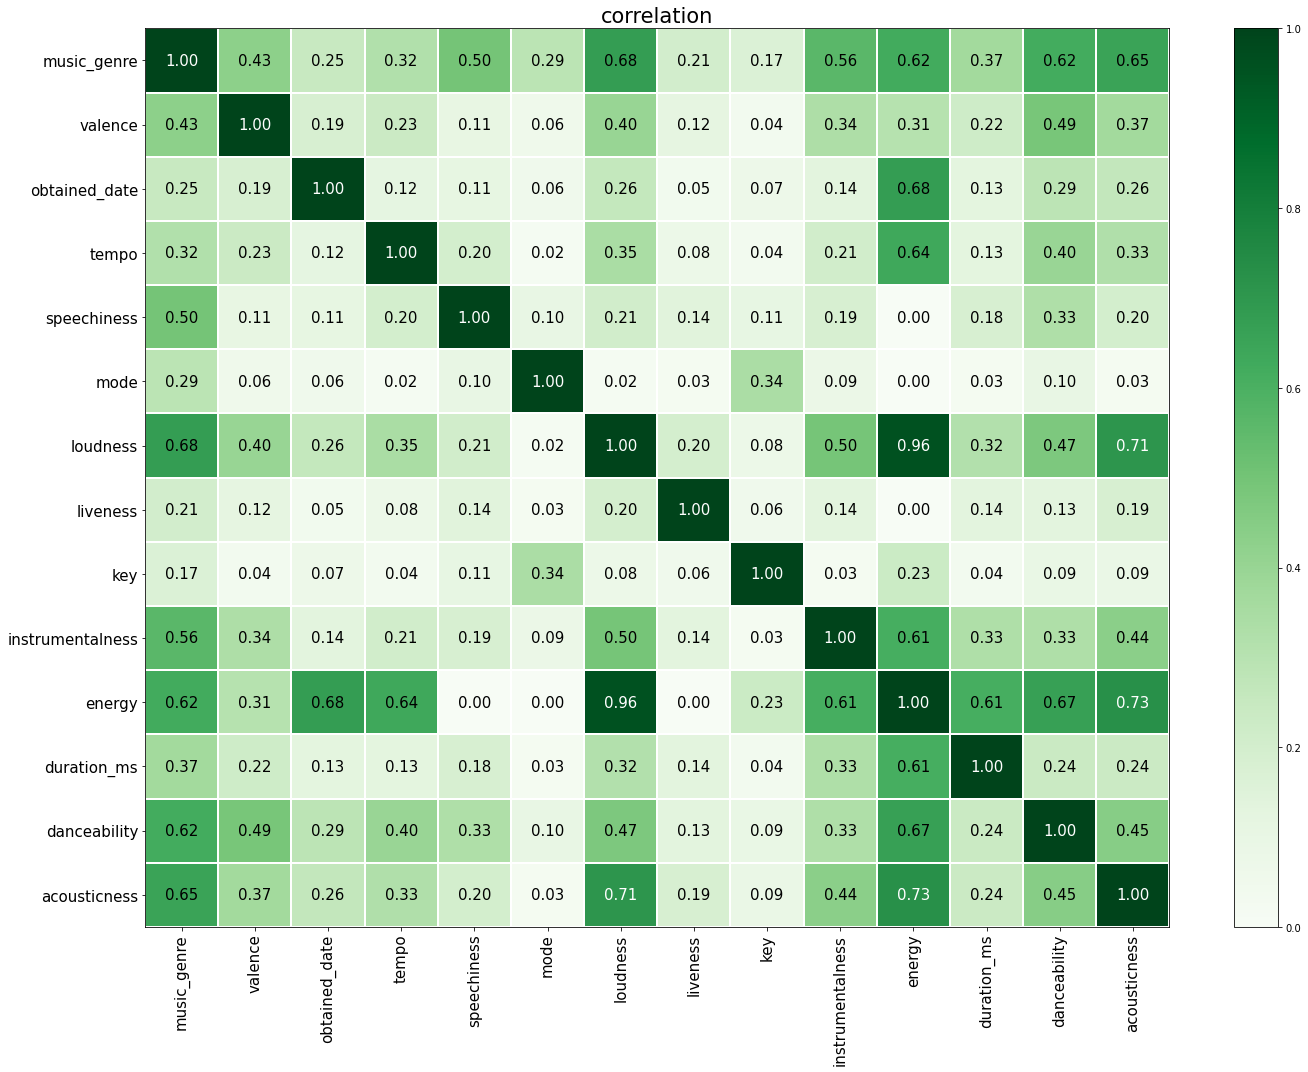

In [156]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        #title=, 
                        fontsize_factor=1.5, 
                        figsize=(20, 15))
plt.tight_layout()

После предобработки данных мультиколлинеарными остались те же признаки -  `energy` и `loudness`.

`loudness` имеет большую корреляцию с целевым признаком, но пока убирать ничего не буду

In [157]:
df_train_copy.isna().sum()

track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [158]:
df_test.isna().sum()

instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
dtype: int64

## Масштабирование численных признаков

In [159]:
print('Численные признаки:', numerical_cols)
print('Количественные признаки:', categorical_cols)
print('Целевой признак:', target)

Численные признаки: ['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
Количественные признаки: ['track_name', 'key', 'mode', 'obtained_date']
Целевой признак: ['music_genre']


In [160]:
print(len(df_train_copy.columns))
print(len(df_test.columns))

15
15


осталось в тестовой выборке удалить столбец с номером трека `instance_id`

In [161]:
df_test_copy = df_test.drop('instance_id', axis=1)

Возьмем RobustScaler

In [225]:
scaler = RobustScaler()
scaler.fit(df_train_copy[numerical_cols])

df_train_copy[numerical_cols] = scaler.transform(df_train_copy[numerical_cols])
df_test_copy[numerical_cols] = scaler.transform(df_test_copy[numerical_cols])

In [163]:
df_train_copy.head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Highwayman,1.023452,0.602347,-0.742041,0.351,-0.319378,D,-0.466644,-1.516395,Major,-0.430525,-0.622318,4-Apr,-0.232649,Country
1,Toes Across The Floor,0.349634,-0.690371,-0.668521,0.670,-0.625693,A,-0.572363,-0.217492,Minor,-0.836892,-0.193295,4-Apr,0.174759,Rock
2,First Person on Earth,0.289081,-0.679267,-0.896830,0.804,-0.626646,E,0.323963,0.588137,Minor,1.907169,-1.416850,4-Apr,-0.653806,Alternative
3,No Te Veo - Digital Single,-0.669361,1.773431,0.341435,0.873,-0.626586,G#,1.247312,0.722930,Minor,0.468109,-0.090656,4-Apr,2.045640,Hip-Hop
4,Chasing Shadows,0.284942,1.065644,-0.536836,0.575,-0.626613,C,0.275100,0.489565,Major,-0.351273,-1.634767,4-Apr,0.569743,Alternative


In [164]:
df_test_copy.head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,Low Class Conspiracy,0.559245,1.164425,-1.388363,0.679,-0.626646,A#,1.151537,0.066061,Minor,1.899412,-1.030958,4-Apr,1.690595
1,The Hunter,1.131926,-1.710169,0.129247,0.523,-0.475805,G#,-0.958867,0.603729,Major,-1.078142,-1.529712,4-Apr,-0.653806
2,Hate Me Now,-1.075401,0.652936,0.701816,0.770,-0.626646,A,-0.556955,0.862221,Minor,1.710632,-1.045352,4-Apr,-0.232649
3,Somebody Ain't You,-0.949895,0.120759,-0.830517,0.749,-0.626646,B,-0.365746,0.790706,Major,-0.364284,1.251784,4-Apr,0.569743
4,Sour Mango,-1.124909,-0.860688,0.243490,0.447,-0.365322,D,-1.976725,-0.308660,Major,1.644250,-1.732198,4-Apr,-1.544012


## Кодирование категориальных признаков методом OHE

во-первых, нужно удалить название трека из выборок

In [165]:
df_train_copy = df_train_copy.drop('track_name', axis=1)
df_test_copy = df_test_copy.drop('track_name', axis=1)

In [166]:
categorical_cols.remove('track_name')

In [167]:
categorical_cols

['key', 'mode', 'obtained_date']

In [168]:
print(df_train_copy.shape)
print(df_test.shape)

(19645, 14)
(5099, 15)


In [169]:
encoder_ohe = OneHotEncoder(drop='first', 
                            handle_unknown='ignore', 
                            sparse=False,
                            #max_categories=10
                           )
encoder_ohe.fit(df_train_copy[categorical_cols])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [170]:
encoder_ohe.get_feature_names_out()

array(['key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E',
       'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor',
       'obtained_date_3-Apr', 'obtained_date_4-Apr',
       'obtained_date_5-Apr'], dtype=object)

In [171]:
df_train_copy[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(df_train_copy[categorical_cols])

In [172]:
df_train_copy = df_train_copy.drop(categorical_cols, axis=1)

In [173]:
df_train_copy.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,obtained_date_3-Apr,obtained_date_4-Apr,obtained_date_5-Apr
0,1.023452,0.602347,-0.742041,0.351,-0.319378,-0.466644,-1.516395,-0.430525,-0.622318,-0.232649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.349634,-0.690371,-0.668521,0.670,-0.625693,-0.572363,-0.217492,-0.836892,-0.193295,0.174759,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.289081,-0.679267,-0.896830,0.804,-0.626646,0.323963,0.588137,1.907169,-1.416850,-0.653806,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.669361,1.773431,0.341435,0.873,-0.626586,1.247312,0.722930,0.468109,-0.090656,2.045640,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.284942,1.065644,-0.536836,0.575,-0.626613,0.275100,0.489565,-0.351273,-1.634767,0.569743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [174]:
df_test_copy[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(df_test_copy[categorical_cols])

In [175]:
df_test_copy = df_test_copy.drop(categorical_cols, axis=1)

In [176]:
df_test_copy.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,obtained_date_3-Apr,obtained_date_4-Apr,obtained_date_5-Apr
0,0.559245,1.164425,-1.388363,0.679,-0.626646,1.151537,0.066061,1.899412,-1.030958,1.690595,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.131926,-1.710169,0.129247,0.523,-0.475805,-0.958867,0.603729,-1.078142,-1.529712,-0.653806,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.075401,0.652936,0.701816,0.770,-0.626646,-0.556955,0.862221,1.710632,-1.045352,-0.232649,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.949895,0.120759,-0.830517,0.749,-0.626646,-0.365746,0.790706,-0.364284,1.251784,0.569743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.124909,-0.860688,0.243490,0.447,-0.365322,-1.976725,-0.308660,1.644250,-1.732198,-1.544012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Кодирование признаков завершено

## Разработка моделей

#### Финальная подготовка данных

Разбиваем тренировочную выборку на признаки и целевой признак

In [177]:
features_train = df_train_copy.drop('music_genre', axis=1)
target_train = df_train_copy['music_genre']

In [178]:
features_test = df_test_copy

In [179]:
features_test.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,obtained_date_3-Apr,obtained_date_4-Apr,obtained_date_5-Apr
0,0.559245,1.164425,-1.388363,0.679,-0.626646,1.151537,0.066061,1.899412,-1.030958,1.690595,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.131926,-1.710169,0.129247,0.523,-0.475805,-0.958867,0.603729,-1.078142,-1.529712,-0.653806,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.075401,0.652936,0.701816,0.770,-0.626646,-0.556955,0.862221,1.710632,-1.045352,-0.232649,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.949895,0.120759,-0.830517,0.749,-0.626646,-0.365746,0.790706,-0.364284,1.251784,0.569743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.124909,-0.860688,0.243490,0.447,-0.365322,-1.976725,-0.308660,1.644250,-1.732198,-1.544012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [180]:
df_train_copy.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'music_genre', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D',
       'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor',
       'obtained_date_3-Apr', 'obtained_date_4-Apr', 'obtained_date_5-Apr'],
      dtype='object')

#### Кодируем целевой признак с помощью LabelEncoder

Кодируем классы в `target`

In [181]:
target_train

0            Country
1               Rock
2        Alternative
3            Hip-Hop
4        Alternative
            ...     
20389           Jazz
20390           Rock
20391    Alternative
20392            Rap
20393     Electronic
Name: music_genre, Length: 19645, dtype: object

In [182]:
label_encoder = LabelEncoder()
target_train_encoded = label_encoder.fit_transform(target_train)

### RandomForestClassifier

Будем использовать для подбора гиперпараметров `GridSearchCV`

In [183]:
model_forest = RandomForestClassifier()

Подбор параметров через GridSearchCV закомментил, чтобы не тратить время 

In [184]:
# %%time
# parameter_grid = { 
#     'n_estimators': [100, 200, 500, 1000],
#     'max_depth' : [2,4,5,6,7,8,10],
#     'class_weight' : ['balanced'],
# }
# model_forest = RandomForestClassifier()
# grid_forest = GridSearchCV(model_forest, parameter_grid, cv = 10, scoring = 'f1_micro', n_jobs = -1, verbose = 1)
# grid_forest.fit(features_train, target_train_encoded)
# from sklearn import metrics
# print(grid_forest.best_params_)
# print(grid_forest.best_score_)

Лучшие параметры {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 1000}

In [185]:
%%time
model_forest = RandomForestClassifier(max_depth = 10, n_estimators = 1000, class_weight='balanced', n_jobs=-1)
model_forest.fit(features_train, target_train_encoded)
predictions_train = model_forest.predict(features_train)
result_f1 = f1_score(target_train_encoded, predictions_train, average='micro')
print('f1-score модели Random Forest Classifier на тренировочной выборке :', result_f1)


f1-score модели Random Forest Classifier на тренировочной выборке : 0.5898192924408246
Wall time: 3.56 s


In [186]:
predictions_test_forest = model_forest.predict(features_test)
predictions_test_forest

array([6, 2, 8, ..., 6, 5, 7])

In [187]:
predictions_test_forest = model_forest.predict(features_test)
predictions_test_forest

array([6, 2, 8, ..., 6, 5, 7])

In [188]:
predictions_test_forest_genres = label_encoder.inverse_transform(predictions_test_forest)
predictions_test_forest_genres

array(['Hip-Hop', 'Blues', 'Rap', ..., 'Hip-Hop', 'Electronic', 'Jazz'],
      dtype=object)

In [189]:
df_test['music_genre'] = predictions_test_forest_genres

In [190]:
df_test.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,48564,Low Class Conspiracy,0.301000,0.757,146213.00,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.9,Hip-Hop
1,72394,The Hunter,0.538000,0.256,240360.00,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.3,Blues
2,88081,Hate Me Now,0.005830,0.678,284000.00,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.4,Rap
3,78331,Somebody Ain't You,0.020300,0.592,177354.00,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.6,Country
4,72636,Sour Mango,0.000335,0.421,248694.86,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.1,Electronic


Составляем итоговую таблицу

In [191]:
df_test_final = pd.DataFrame(df_test.loc[: , ['instance_id', 'music_genre']])
df_test_final = df_test_final.set_index('instance_id')
df_test_final.head()

,music_genre
instance_id,
48564,Hip-Hop
72394,Blues
88081,Rap
78331,Country
72636,Electronic


#### Сохранение файла модели Random Forest Classifier

In [192]:
df_test_final.to_csv('./test_final_forest.csv')

#### Оценка важности признаков Random Forest Classififer

In [193]:
importances = model_forest.feature_importances_
feature_list = list(features_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results.head(10)

,feature,importance
0,instrumentalness,0.146656
1,loudness,0.146193
2,speechiness,0.134129
3,acousticness,0.131522
4,danceability,0.122880
5,energy,0.105477
6,duration_ms,0.055213
7,valence,0.044267
8,tempo,0.033955
9,liveness,0.027668


### Модель SVC

Создаем модель

In [194]:
model_svc = SVC()

Выбираем параметры, которые будем перебирать

In [195]:
param_grid = {'C':[1,2,3],'gamma':[1, 0.1], 'kernel':['linear','rbf']}

In [196]:
# %%time
# grid = GridSearchCV(model_svc,param_grid,refit = True, verbose=2, n_jobs = -1)
# grid.fit(features_train,target_train_encoded)
# print(grid.best_params_)

In [197]:
%%time
model_svc = SVC(C=2, gamma = 0.1, kernel='rbf')
model_svc.fit(features_train, target_train_encoded)
predictions_train = model_svc.predict(features_train)
result_f1 = f1_score(target_train_encoded, predictions_train, average='micro')

Wall time: 39.2 s


In [198]:
result_f1

0.5518961567828964

In [199]:
predictions_test_svc = model_svc.predict(features_test)
predictions_test_svc

array([8, 4, 8, ..., 8, 5, 2])

In [200]:
predictions_test_svc_genres = label_encoder.inverse_transform(predictions_test_svc)
predictions_test_svc_genres

array(['Rap', 'Country', 'Rap', ..., 'Rap', 'Electronic', 'Blues'],
      dtype=object)

In [201]:
df_test['music_genre'] = predictions_test_svc_genres
df_test_final = pd.DataFrame(df_test.loc[: , ['instance_id', 'music_genre']])
df_test_final = df_test_final.set_index('instance_id')
df_test_final.head()

,music_genre
instance_id,
48564,Rap
72394,Country
88081,Rap
78331,Country
72636,Alternative


#### Сохраняем результаты модели SVC

In [202]:
df_test_final.to_csv('./test_final_svc.csv')

### SGD-classifier

In [203]:
model_sgd = SGDClassifier()

In [204]:
parameters_grid = {
       'alpha' : np.linspace(0.00001, 0.0001, 15),
       'learning_rate': ['optimal', 'constant', 'invscaling'],
       'eta0' : np.linspace(0.00001, 0.0001, 15),
       'max_iter' : np.arange(5,10),
   }

In [205]:
# %%time
# grid = GridSearchCV(model_sgd,parameters_grid, n_jobs = -1)
# grid.fit(features_train,target_train_encoded)
# print(grid.best_params_)

In [206]:
%%time
model_sgd = SGDClassifier(alpha=0.00001, learning_rate='constant', eta0 = 0.00001, max_iter=9)
model_sgd.fit(features_train, target_train_encoded)
predictions_train = model_sgd.predict(features_train)
result_f1 = f1_score(target_train_encoded, predictions_train, average='micro')

Wall time: 119 ms


C:\Users\Alexander\practicum\practicum_env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [207]:
result_f1

0.38498345635021636

In [208]:
predictions_test_sgd = model_sgd.predict(features_test)
predictions_test_sgd

array([8, 1, 8, ..., 8, 5, 2])

In [209]:
predictions_test_sgd_genres = label_encoder.inverse_transform(predictions_test_sgd)
predictions_test_sgd_genres

array(['Rap', 'Anime', 'Rap', ..., 'Rap', 'Electronic', 'Blues'],
      dtype=object)

In [210]:
df_test['music_genre'] = predictions_test_sgd_genres
df_test_final = pd.DataFrame(df_test.loc[: , ['instance_id', 'music_genre']])
df_test_final = df_test_final.set_index('instance_id')
df_test_final.head()

,music_genre
instance_id,
48564,Rap
72394,Anime
88081,Rap
78331,Country
72636,Classical


### Сохраняем результат одели SGD

In [211]:
df_test_final.to_csv('./test_final_sgd.csv')

### Catboost

In [212]:
from catboost import CatBoostClassifier

In [213]:
model_cat = CatBoostClassifier(iterations=1000, logging_level='Silent')

In [214]:
# %%time 

# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}

# grid_search_result = model_cat.grid_search(grid,
#                                        X=features_train,
#                                        y=target_train_encoded,
#                                           )
# print(grid_search_result['params'])

In [215]:
model_cat = CatBoostClassifier(iterations=1000, logging_level='Silent', depth=4, l2_leaf_reg=3,learning_rate=0.03)

In [216]:
# features_train = features_train.drop('energy', axis=1)

In [217]:
model_cat.fit(features_train, target_train_encoded)

In [218]:
predictions_train = model_cat.predict(features_train)


In [219]:
predictions_test_cat = model_cat.predict(features_test)
predictions_test_cat

array([[8],
       [9],
       [8],
       ...,
       [8],
       [5],
       [2]], dtype=int64)

In [220]:
predictions_test_cat_genres = label_encoder.inverse_transform(predictions_test_cat)
predictions_test_cat_genres

C:\Users\Alexander\practicum\practicum_env\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Rap', 'Rock', 'Rap', ..., 'Rap', 'Electronic', 'Blues'],
      dtype=object)

In [221]:
df_test['music_genre'] = predictions_test_cat_genres
df_test_final = pd.DataFrame(df_test.loc[: , ['instance_id', 'music_genre']])
df_test_final = df_test_final.set_index('instance_id')
df_test_final.head()

,music_genre
instance_id,
48564,Rap
72394,Rock
88081,Rap
78331,Country
72636,Alternative


#### Сохраняем результат модели Catboost

In [222]:
df_test_final.to_csv('./test_final_catboost.csv')

#### Важность признаков Catboost

In [223]:
importances = model_cat.get_feature_importance()
feature_list = list(features_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results.head(10)

,feature,importance
0,instrumentalness,19.692133
1,speechiness,14.762979
2,danceability,14.702244
3,acousticness,10.849543
4,loudness,10.450569
5,energy,7.660104
6,valence,7.519497
7,duration_ms,6.297783
8,tempo,2.689836
9,mode_Minor,1.790962


In [224]:
features_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,obtained_date_3-Apr,obtained_date_4-Apr,obtained_date_5-Apr
0,1.023452,0.602347,-0.742041,0.351,-0.319378,-0.466644,-1.516395,-0.430525,-0.622318,-0.232649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.349634,-0.690371,-0.668521,0.670,-0.625693,-0.572363,-0.217492,-0.836892,-0.193295,0.174759,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.289081,-0.679267,-0.896830,0.804,-0.626646,0.323963,0.588137,1.907169,-1.416850,-0.653806,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.669361,1.773431,0.341435,0.873,-0.626586,1.247312,0.722930,0.468109,-0.090656,2.045640,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.284942,1.065644,-0.536836,0.575,-0.626613,0.275100,0.489565,-0.351273,-1.634767,0.569743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,1.386457,0.954634,-0.020022,0.483,-0.626646,-1.054589,-1.064573,-0.516185,-1.166428,1.690595,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
20390,0.122205,-0.522335,-0.480148,0.362,-0.523617,-0.845641,-0.596819,-1.056491,-1.590466,-1.090290,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
20391,-1.122407,0.558263,-0.147117,0.886,-0.626179,1.058577,0.952964,-0.813132,0.882031,1.690595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20392,-1.099867,2.244925,-1.093086,0.515,-0.626646,-0.619212,-0.520530,1.899412,0.968872,-1.090290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Вывод по проекту

Прежде, чем приступать к моделям, данные были предобработаны:
* исправлены значения в в столбце `duration_ms` с помощью KNN Imputer
* заполнены пропуски в столбце `tempo` также с помощью KNN Imputer
* заполнены пропуски в столбцах `key` и `mode` с помощью `.fillna(method='ffill')` (я решил так сделать, чтобы не изменился вид распределения этих признаков : для столбца `mode`, думаю, что точно оправдано, т.к. там всего 2 варианта - мажор и минор)

Оценена корреляция с помощью phik. Установлено, что к мультиколлинеарным признаком относятся `loudness` и `energy` ( > 0.8). У `loudness` больше корреляция с целевым признаком
Тем не менее столбец `energy` я не удалял при подборе гиперпараметров. 

Количественные признаки были закодированы с использованием OneHotEncoder. Для масштабирования численных признаков был опробован как StandardScaler, так и RobustScaler.

Были проверены 4 модели мультиклассовой классификации:
* Модель случайного леса
* SVC (Support Vector Classification) модель 
* SGD (Stochastic gradient descent) модель 
* Catboost

Для каждой модели с помощью Grid Search из некоторого диапазона гиперпараметров были выбраны наилучшие.

Результаты каждой модели были проверены на платформе Kaggle на странице с соревнованием (https://www.kaggle.com/competitions/music-genre-prediction-m126ds/overview)

Лучший результат выдала модель `Catboost`. Из отрицательного - для модели catboost расчет гиперпараметров был наиболее долгим. (Что интересно - я запускал эту тетрадку в итоговом виде и на Macbook Air M1 (2020)  и на десктопе Core i7 13700K. Гиперпараметры на макбуке были расчитаны за 14 минут 58 секунд, а на десктопе за 43 минуты 46 секунд. Для остальных моделей десктоп на 20-30% был быстрее при расчете гиперпараметров, но время расчета было не более 6-7 минут на макбуке. Хотелось бы узнать в чем причина)

Для модели `Catboost`, где данные масштабировались с помощью `StandardScaler`: Private Score - 0.49647, а Public Score - 0.47940

Для модели `Catboost`, где данные масштабировались с помощью `RobustScaler`: Private Score - 0.50196, а Public Score - 0.48175. 

При использовании `PowerTransformer`  результаты были аналогичны тем, что и при использовании `RobustScaler`



